<a href="https://colab.research.google.com/github/rasoco/master_data_science/blob/master/TFM/BiciMadProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BiciMad Project  - Master Data Science KSchool Ed.019



## Conect with GPU of Google 



In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU no encontrada')
print('Encontrada GPU: {}'.format(device_name))

Encontrada GPU: /device:GPU:0


In [ ]:
# !pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
drive

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Exploration and cleaning Jan18 Dataset

####Load of Libraries

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn 

####Acquiring data

In [ ]:
downloaded = drive.CreateFile({'id':'1dBJtPkHMvyF5Pmeu-w8z-Y91smROB_6b'})
downloaded.GetContentFile('jan18.json')
# downloaded.GetContentFile('jan18_clean.json')

In [ ]:
print(os.getcwd)

<built-in function getcwd>


#### Reading and Exploring data

In [ ]:
jan18 = pd.read_json("jan18.json",encoding="utf-8", lines=True, dtype='frame')# open de file

In [ ]:
jan18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263702 entries, 0 to 263701
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   _id               263702 non-null  object
 1   user_day_code     263702 non-null  object
 2   idplug_base       263702 non-null  int64 
 3   user_type         263702 non-null  int64 
 4   idunplug_base     263702 non-null  int64 
 5   travel_time       263702 non-null  int64 
 6   idunplug_station  263702 non-null  int64 
 7   ageRange          263702 non-null  int64 
 8   idplug_station    263702 non-null  int64 
 9   unplug_hourTime   263702 non-null  object
 10  zip_code          263702 non-null  object
dtypes: int64(7), object(4)
memory usage: 22.1+ MB


In [ ]:
# Save of position in _id column 
position = dict(enumerate(jan18['_id'].values))
position
type(position)
ids = []
# Save of values in its position 
ids = []
for d, v in position.items():
    ids += list(v.values())
#Save in the column _id
jan18['_id'] = ids 

In [ ]:
na_columns = ['_id', 'user_day_code', 'idunplug_station', 'idunplug_base', 'idplug_station', 'idplug_base',
   'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']
jan18 = jan18[na_columns]
jan18 = jan18.rename(columns = {'_id':'id'})

# jan18.columns = ['_id', 'user_day_code', 'idunplug_base','idunplug_station','idplug_base', 'idplug_station',
#        'user_type','travel_time','unplug_hourTime', 'ageRange', 'zip_code']

In [ ]:
# jan18.to_csv('jan18_clean.csv') # to save the dataset

In [ ]:
jan18.head(1000)

,id,user_day_code,idunplug_station,idunplug_base,idplug_station,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010
1,5a505acd2f384319304ed615,65a82ac6353d9e8b25c17a49bb46d09426757b40946370...,24,21,117,4,1,666,{'$date': '2018-01-01T00:00:00.000+0100'},0,
2,5a505acd2f384319304ed616,51b7da733980586e1f847b61cc4af9c0268fc2d09df63e...,24,19,117,19,1,662,{'$date': '2018-01-01T00:00:00.000+0100'},0,
3,5a505acd2f384319304ed617,0af09bb0e23045fb7328123044822a0eb9cf154d644a96...,82,2,110,1,1,708,{'$date': '2018-01-01T00:00:00.000+0100'},3,28005
4,5a505acd2f384319304ed619,500e6780660a1fb237f8e5410992296141a46b141ed3ff...,169,3,58,5,1,171,{'$date': '2018-01-01T00:00:00.000+0100'},4,28004
...,...,...,...,...,...,...,...,...,...,...,...
995,5a505ad12f384319304eda71,9a81bb7bb1387b1f8b8b1a7aa6ca1480bce52f9f200017...,17,13,149,1,1,521,{'$date': '2018-01-01T06:00:00.000+0100'},4,28003
996,5a505ad12f384319304eda73,1720f4676d55c2dff9707ad03792e832943de8c20faa27...,166,24,103,23,1,338,{'$date': '2018-01-01T06:00:00.000+0100'},3,28009
997,5a505ad12f384319304eda72,8c088f94ff94c5dbed094c45f7e80210a13910017a0b49...,5,19,170,3,1,1113,{'$date': '2018-01-01T06:00:00.000+0100'},0,
998,5a505ad12f384319304eda74,7bf4c6de14f6289c6fb33663b93fa5f723a7fc5a080e6e...,14,22,26,3,1,341,{'$date': '2018-01-01T06:00:00.000+0100'},4,28001


In [ ]:
# jan18[jan18['idplug_station'] == 2008] #show the result

In [ ]:
jan18 = jan18.drop(jan18[jan18.idplug_station == 2008].index) #deleting values 2008

In [ ]:
jan18.isna().sum()

id                  0
user_day_code       0
idunplug_station    0
idunplug_base       0
idplug_station      0
idplug_base         0
user_type           0
travel_time         0
unplug_hourTime     0
ageRange            0
zip_code            0
dtype: int64

In [ ]:
# About null 
jan18.isnull().sum()

id                  0
user_day_code       0
idunplug_station    0
idunplug_base       0
idplug_station      0
idplug_base         0
user_type           0
travel_time         0
unplug_hourTime     0
ageRange            0
zip_code            0
dtype: int64

# Exploration and cleaning Madrid Stations

###Load of the libraries


In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium # To display maps with coordinates and markers.
import geopy # For geocoding and reverse geocoding.


### Load of the Madrid Stations dataset


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8') #decimal is okey
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Número            216 non-null    object 
 1   Gis_X             216 non-null    object 
 2   Gis_Y             216 non-null    object 
 3   Fecha de Alta     216 non-null    object 
 4   Distrito          216 non-null    object 
 5   Barrio            216 non-null    object 
 6   Calle             216 non-null    object 
 7   Nº Finca          216 non-null    object 
 8   Tipo de Reserva   216 non-null    object 
 9   Número de Plazas  216 non-null    int64  
 10  Unnamed: 10       0 non-null      float64
 11  LONGITUD          216 non-null    float64
 12  LATITUD           216 non-null    float64
 13  DIRECCION         216 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 23.8+ KB


In [ ]:
del df['Unnamed: 10']

In [ ]:
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df.head()

,id,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Anclajes,LONGITUD,LATITUD,DIRECCION,Year,ids
0,001 a,"440443,61","4474290,65",04/12/2019,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"CALLE DE ALCALA, 2",2019,1
1,001 b,"440480,56","4474301,74",06/02/2020,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"CALLE DE ALCALA, 6",2020,1
2,2,"440134,83","4474678,23",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"CALLE DE MIGUEL MOYA, 1",2014,2
3,3,"440012,98","4475760,68",23/06/2014,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430323,"PLAZA DEL CONDE DEL VALLE DE SUCHIL, 2",2014,3
4,4,"440396,4","4475565,36",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428591,"CALLE DE MANUELA MALASAÑA, 3",2014,4


In [ ]:
df.columns

Index(['id', 'Gis_X', 'Gis_Y', 'Fecha de Alta', 'Distrito', 'Barrio', 'Calle',
       'Nº Finca', 'Tipo de Reserva', 'Número de Plazas', 'LONGITUD',
       'LATITUD', 'DIRECCION', 'Year'],
      dtype='object')

In [ ]:
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order
df.head()

,id,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,LONGITUD,LATITUD,DIRECCION,Year,ids
0,001 a,"440443,61","4474290,65",04/12/2019,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"CALLE DE ALCALA, 2",2019,1
1,001 b,"440480,56","4474301,74",06/02/2020,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"CALLE DE ALCALA, 6",2020,1
2,2,"440134,83","4474678,23",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"CALLE DE MIGUEL MOYA, 1",2014,2
3,3,"440012,98","4475760,68",23/06/2014,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430323,"PLAZA DEL CONDE DEL VALLE DE SUCHIL, 2",2014,3
4,4,"440396,4","4475565,36",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428591,"CALLE DE MANUELA MALASAÑA, 3",2014,4


### Grouping Distrito and show values unique and not unique of "id"

In [ ]:
df.groupby('Distrito')['ids']\
      .agg(['nunique', 'unique'])\
      .sort_values(by='nunique', ascending=False)

,nunique,unique
Distrito,,
01 CENTRO,57,"[1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, ..."
04 SALAMANCA,37,"[87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 9..."
03 RETIRO,26,"[60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 7..."
07 CHAMBERÍ,24,"[3, 8, 111, 122, 123, 124, 125, 126, 127, 128,..."
02 ARGANZUELA,22,"[46, 47, 118, 119, 120, 121, 162, 163, 164, 16..."
05 CHAMARTÍN,18,"[136, 137, 139, 140, 146, 147, 148, 149, 150, ..."
06 TETUÁN,11,"[133, 151, 152, 153, 154, 155, 156, 204, 205, ..."
09 MONCLOA-ARAVACA,9,"[14, 110, 112, 113, 114, 115, 116, 117, 161]"
15 CIUDAD LINEAL,2,"[188, 189]"


In [ ]:
# df.groupby('OBJECTID')['OBJECTID'].agg(['nunique','unique'])
# df.groupby('Estación')['Estación'].agg(['unique'])

In [ ]:
def agrupation(b,c):
    # b = ""
    # c = ""
    a = df.groupby('b')['c'].agg(['nunique','unique'])
    print(a)


In [ ]:
# Name of values unique of Distrito
df['Distrito'].unique()

array(['01 \xa0CENTRO', '07 \xa0CHAMBERÍ', '09 \xa0MONCLOA-ARAVACA',
       '02 \xa0ARGANZUELA', '03 \xa0RETIRO', '04 \xa0SALAMANCA',
       '06 \xa0TETUÁN', '05 \xa0CHAMARTÍN', '13 \xa0PUENTE DE VALLECAS',
       '15 \xa0CIUDAD LINEAL'], dtype=object)

In [ ]:
# # Change the name of Distrito

# distrito_bike = ['01 CENTRO', '02 ARGANZUELA'. '03 RETIRO', '04 SALAMANCA', '05 CHAMARTÍN', '06 TETUÁN', '07 CHAMBERÍ', '09 MONCLOA - ARAVACA']
# df['distrito'] = df[distrito_bike]
# bikestations['WKT'] = bikestations[['X','Y']].apply(lambda x: ''.join(x), axis=1)
# # bikestations['p'] = df[['Year', 'quarter']].apply(lambda x: ''.join(x), axis=1)

# bikestations['WKT'] = bikestations.X.str.cat(bikestations.Y)

# import folium
# # from folium.plugins import MarkerCluster
# import pandas as pd
 
# SF_COORDINATES = (-3.701305, 40.418893)
# df
 
# # for speed purposes
# MAX_RECORDS = 170
  
# # create empty map zoomed in on San Francisco
# mapa = folium.Map(location=SF_COORDINATES, zoom_start=12)
# marker_cluster = folium.Marker().add_to(mapa) 

 
# # add a marker for every record in the filtered data, use a clustered view
# for each in df[0:MAX_RECORDS].iterrows():
#     folium.Marker(
#         location = [each[0]['Y'],each[0]['X']], 
#         clustered_marker = True).add_to(marker_cluster)
  
# display(mapa)

# for each in df[0:MAX_RECORDS].iterrows():
#   print(each[1,2])
#     # folium.Marker(
#     #     location = [each[0]['Y'],each[0]['X']], 
#     #     clustered_marker = True).add_to(marker_cluster)

# import folium
# from folium.plugins import MarkerCluster

# map1 = folium.Map(location=SF_COORDINATES, zoom_start=12)
# marker_cluster = MarkerCluster().add_to(map1) 

# for each in data[0:MAX_RECORDS].iterrows():
#     map1.Marker(location = [each[1]['Y'],each[1]['X']], 
#     clustered_marker = True).add_to(marker_cluster)

# display(map1)

# import requests 
# import os 
# def coord(c):
#     coor = re.compile(r'-?\d+\.\d{7}', c)
#     coords = [float(s) for s in coor]
#     return coords[::-1]

# bikestations['X'] = bikestations['X'].apply(coord)

# # filtramos solo las bicicleterías de palermo
# bici_centro = bikestations[bikestations.Distrito == '01 CENTRO'][['X', 'Y', 'Anclajes']]

#### Analysis of total Barrio per Distrito


In [ ]:
d_b = df.groupby(['Distrito'])['Barrio'].count()
d_b


Distrito
01  CENTRO                60
02  ARGANZUELA            22
03  RETIRO                27
04  SALAMANCA             38
05  CHAMARTÍN             18
06  TETUÁN                11
07  CHAMBERÍ              26
09  MONCLOA-ARAVACA       11
13  PUENTE DE VALLECAS     1
15  CIUDAD LINEAL          2
Name: Barrio, dtype: int64

#### Show graphic of the Bike Station by Distrito

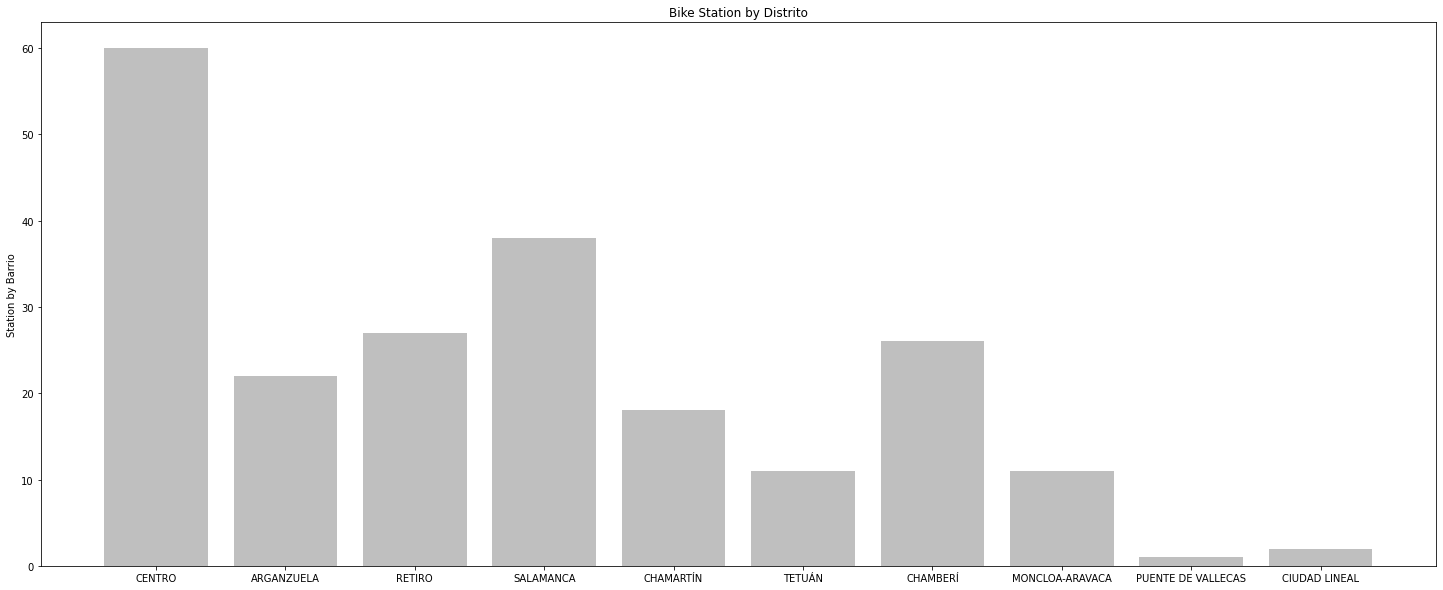

In [ ]:
import matplotlib.pyplot as plt
# fig = plt.figure()
# fig.add_axes(langs)
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'CIUDAD LINEAL']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_b, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
plt.ylabel('Station by Barrio')
plt.title('Bike Station by Distrito')

plt.show()

In [ ]:
df.groupby('Distrito')['Anclajes'].agg(['count', 'sum', 'mean']).sort_values(by='sum', ascending=False)

,count,sum,mean
Distrito,,,
01 CENTRO,60,1419,23.650000
04 SALAMANCA,38,906,23.842105
03 RETIRO,27,664,24.592593
07 CHAMBERÍ,26,584,22.461538
02 ARGANZUELA,22,541,24.590909
05 CHAMARTÍN,18,426,23.666667
06 TETUÁN,11,258,23.454545
09 MONCLOA-ARAVACA,11,243,22.090909
15 CIUDAD LINEAL,2,51,25.500000


#### Total Anclaje by Year

In [ ]:
df.groupby('Year')['Anclajes'].agg(['sum'])

,sum
Year,
2014,2872
2015,939
2016,24
2017,44
2018,15
2019,1147
2020,75


In [ ]:
df['Anclajes'].sum()

5116

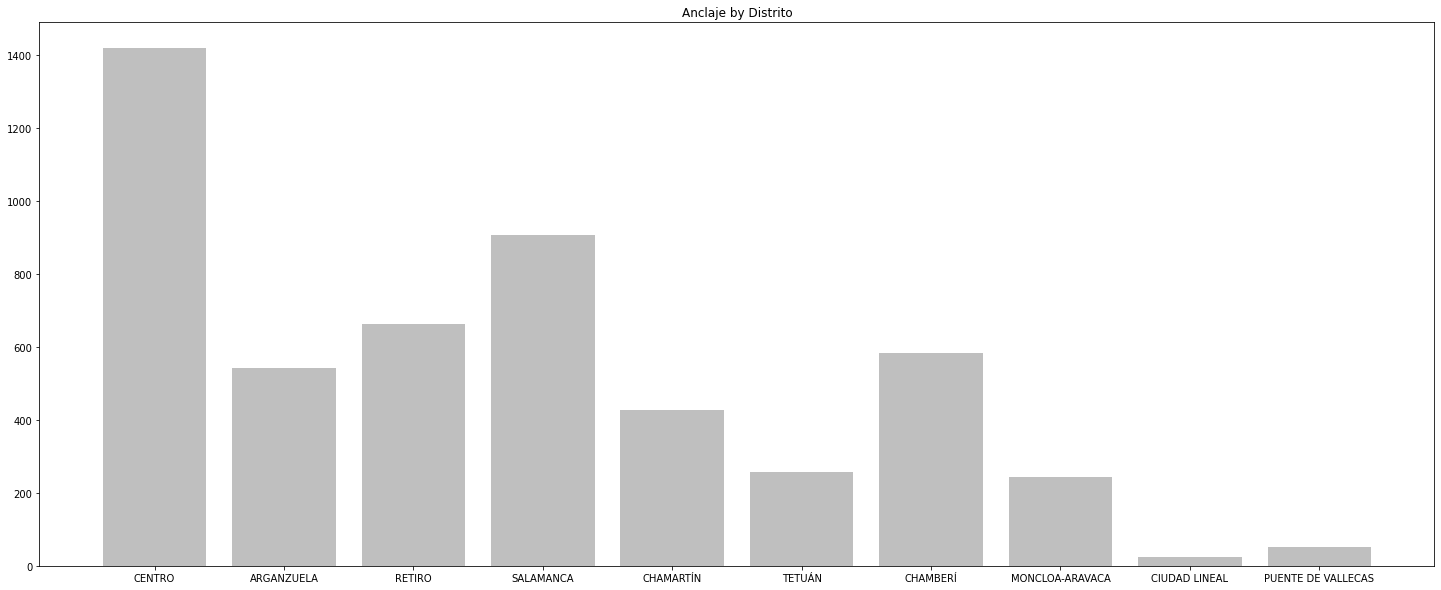

In [ ]:
d_a = df.groupby('Distrito')['Anclajes'].sum()
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'CIUDAD LINEAL', 'PUENTE DE VALLECAS']
# ax.bar(langs,aa)
# plt.show()
fig=plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
fig.set_facecolor('white')
y_pos = np.arange(len(langs))
plt.bar(y_pos, d_a, align='center', alpha=0.5, width=0.8, color = 'gray')
plt.xticks(y_pos, langs)
# plt.ylabel('Anclaje by Disti')
plt.title('Anclaje by Distrito')

plt.show()

<Figure size 7200x10800 with 0 Axes>

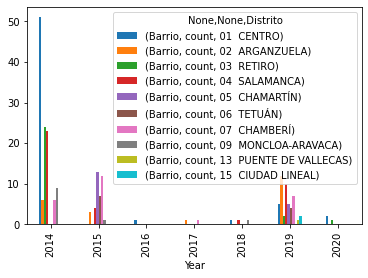

In [ ]:
year_distrito = df.groupby(['Year','Distrito']).agg({'Barrio': ['count']})
fig1=plt.figure()
# rect = l,b,w,h
# fig1.add_axes(rect, frameon=False, axisbg='g')
# fig1.add_axes([2014, 2015, 2016, 2017, 2018, 2019, 2020])
# fig1.subplots_adjust(wspace=0.9, hspace=0.9)
fig1.set_figheight(150)
fig1.set_figwidth(100)
year_distrito.unstack().plot.bar()


In [ ]:
# plt.figure(figsize=[10,8])
# # x=d_a
# # x=d_b
# # n,bins,pat.hist([x,y])

# plt.hist([d_a,d_b])

In [ ]:
d_e = df.groupby('id')['Distrito'].sum()
d_e

id
001 a                01  CENTRO
001 b                01  CENTRO
020 ampliacion       01  CENTRO
025 a                01  CENTRO
025 b                01  CENTRO
                      ...      
95                04  SALAMANCA
96                04  SALAMANCA
97                04  SALAMANCA
98                04  SALAMANCA
99                04  SALAMANCA
Name: Distrito, Length: 216, dtype: object

  #### Get of coordinates (Longitude and Latitude)








In [ ]:
locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
len(locationlist)
# locationlist 


216

In [ ]:
df['Locationlist'] = locationlist

#### Scatterplot of X, Y

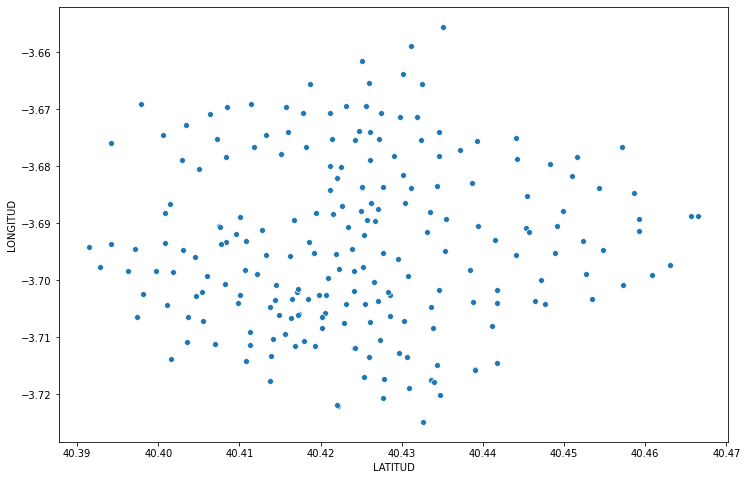

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(df['LATITUD'], df['LONGITUD'])

#### Testing of map

In [52]:
import pandas as pd
import numpy as np
# import streamlit as st
import matplotlib.pyplot as plt
# import folium.plugins
# import plotly.express as px
from folium.plugins import MarkerCluster
# from bokeh.plotting import figure, output_file, show
# from streamlit_folium import folium_static

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8')
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order

d_b = df.groupby(['Distrito'])['Barrio'].count()

locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
df['Locationlist'] = locationlist

map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.plugins.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

AttributeError: ignored

#### Display of bike map in Madrid

In [ ]:
map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
map1  

#### Display of BikeMadrid per Distrito

In [ ]:
import folium.plugins
folium.plugins.MarkerCluster()
map2 = folium.Map(location=[40.417110795315295, -3.70199802576925], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='green', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
map2

In [ ]:
import plotly.express as px
fig = px.scatter_geo(df, locations=df['Locationlist'], locationmode='country names', color= df['Distrito'].sort_values(), hover_name=df['Calle'],
                     size=df['Anclajes'], scope='europe', 
                     animation_frame=df['Year'].sort_values(), 
                     projection='stereographic')
# (df, locations="Locationlist", hover_name="Distrito", animation_frame="Year", projection="natural earth")
fig.show()

#### Streamlit


In [46]:
!pip install -q streamlit


In [7]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2020-07-27 13:12:11--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.225.3.211, 50.16.94.112, 3.220.228.61, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.225.3.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.13M  6.04MB/s    in 2.2s    

2020-07-27 13:12:14 (6.04 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13773305/13773305]

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [19]:
!pip install streamlit-folium #streamlit with folium

In [40]:
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
"import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://b7ba1380e2a1.ngrok.io


In [41]:
%%file BiciMad.py
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import folium.plugins
import plotly.express as px
# from bokeh.plotting import figure, output_file, show
from streamlit_folium import folium_static

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/originalbikestations.csv", sep=';', encoding='utf-8')
df['Year'] = pd.DatetimeIndex(df['Fecha de Alta']).year
year = df['Year']
df = df.rename(columns = {'Número':'id','Número de Plazas':'Anclajes'}) #change de name of column Número
df['ids'] = df['id'].str.rstrip('ampliacionb') #to get only number values
# df_stations = df_stations[onlycolumns]
df['ids'] = df['ids'].astype(int).sort_values() #change values ids and order

d_b = df.groupby(['Distrito'])['Barrio'].count()

locations = df[['LATITUD', 'LONGITUD']] # (Y, X)
locationlist = locations.values.tolist()
df['Locationlist'] = locationlist

st.title("Bici Madrid")

# fig = plt.figure()
# fig.add_axes(langs)
langs = ['CENTRO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA', 'CHAMARTÍN', 'TETUÁN', 'CHAMBERÍ', 'MONCLOA-ARAVACA', 'PUENTE DE VALLECAS', 'CIUDAD LINEAL']
# ax.bar(langs,aa)
# plt.show()
# p = plt.figure()
# p.set_figheight(10)
# p.set_figwidth(25)
# p.set_facecolor('white')
# y_pos = np.arange(len(langs))
# plt.bar(y_pos, d_b, align='center', alpha=0.5, width=0.8, color = 'gray')
# plt.xticks(y_pos, langs)
# plt.ylabel('Station by Barrio')
# plt.title('Bike Station by Distrito')

# plt.show()
# st.bokeh_chart(p)
st.title("Puntos de estacionamientos por Distrito")
map1 = folium.Map(location=[40.417110795315295, -3.70199802576925], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='white', icon='bicycle', angle=0, prefix='fa')).add_to(map1)
folium_static(map1) 


st.title("Puntos de anclajes por Distrito")
import folium.plugins
folium.plugins.MarkerCluster()
map2 = folium.Map(location=[40.417110795315295, -3.70199802576925], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df['Distrito'][point], icon=folium.Icon(color='darkblue', icon_color='green', icon='bicycle', angle=0, prefix='fa')).add_to(marker_cluster)
folium_static(map2)



import plotly.express as px
fig2 = px.scatter_geo(df, locations=df['Locationlist'], locationmode='country names', color= df['Distrito'].sort_values(), hover_name=df['Calle'],
                     size=df['Anclajes'], scope='europe', 
                     animation_frame=df['Year'].sort_values(), 
                     projection='stereographic')
# (df, locations="Locationlist", hover_name="Distrito", animation_frame="Year", projection="natural earth")
# folium_static(fig2)


Overwriting BiciMad.py


In [42]:
!streamlit run BiciMad.py


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.234.9.164:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/streamlit/server/Server.py", line 419, in _loop_coroutine
    yield tornado.gen.sleep(0.01)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1013, in sleep
    lambda: future_set_result_unless_cancelled(f, None))
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 638, in call_later
    return self.call_at(self.time() + delay, callback, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 144, in call_at
    max(0, when - self.time()), self._run_callback,
  File "/usr/local/lib/python3.6/dist-packages/streamlit/bootstrap.py", line 44, in signal_handler
    Server.get_current().stop()
  File "/usr/local/lib/python3.6/dist-packages/streamlit/server/Server.py", line 499, in s

### Machine Learning 

#### Transformation is to convert the latitude and longitude to radians instead of degrees

In [ ]:
import numpy as np
df["X"] = np.radians(df["Longitud"]) # add new columns with transformation to radians
X = df['X']
df["Y"] = np.radians(df["Latitud"])
Y = df['Y']

#### Unsupervised Model using KMeans Clustering 

In [ ]:
from sklearn.cluster import KMeans

# Creates 5 clusters using hierarchical clustering.
model1 = AgglomerativeClustering(n_clusters =5, affinity='euclidean', linkage='ward')

df['pickup cluster'] = model1.fit_predict(df[['X','Y']])

# creates 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5)
clusters = kmeans.fit_predict(df[['X','Y']])
df['pickup cluster'] = kmeans.predict(df[['X','Y']])


NameError: ignored

#### Display Clustering

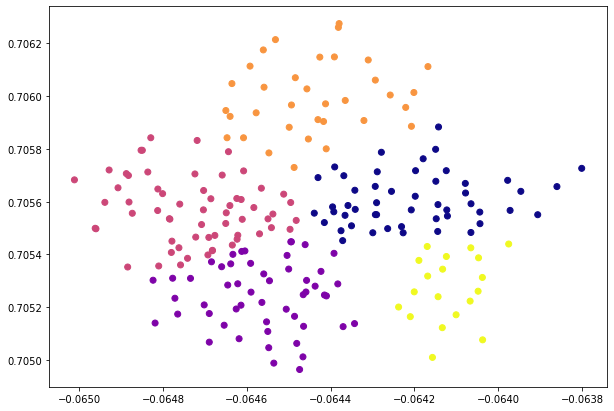

In [ ]:
figure = plt.figure(figsize=(10,7))
plt.scatter(X, Y, c=clusters, cmap="plasma",linewidths=1)

# figure.set_figheight(10)
# figure.set_figwidth(10)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.06420417,  0.70560685],
       [-0.06456351,  0.70524355],
       [-0.06472402,  0.70556766],
       [-0.06444156,  0.70599497],
       [-0.06411811,  0.70527156]])

#### Displaying clustering with its centroids


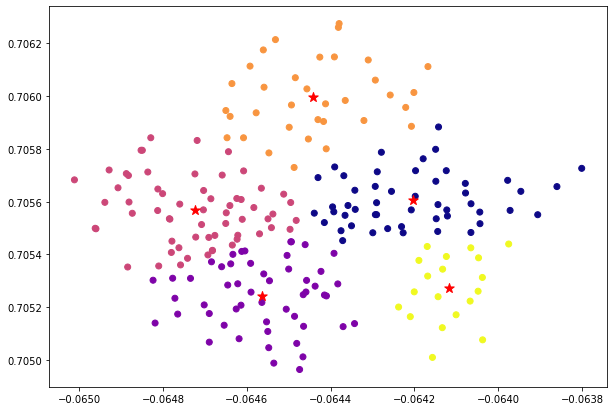

In [ ]:
K = 5
figure = plt.figure(figsize=(10,7))
plt.scatter(X, Y, c=clusters, cmap="plasma", linewidths=1);
for k in range(K):
  plt.scatter(centroids[k,0], centroids[k, 1], s=100, marker='*', color='red')

plt.show()

In [ ]:
model1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
labels = kmeans.predict(df[["X", "Y"]])
labels

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2], dtype=int32)

#### Metrics: Sum of Square Error

In [ ]:
sse = kmeans.inertia_
sse

6.779488346606935e-06

In [ ]:
# data = df['pickup cluster']
# # Sum of Squared Error

# # np.sum(np.square(np.linalg.norm(df['pickup cluster'] - centroids[clusters], axis=1)))
# def sse(data, clusters, centroids):
#     return np.sum(np.square(np.linalg.norm(data - centroids[clusters], axis=1))) 

# ks = range(2, 20)
# sse_errors = np.zeros(len(ks))

# for i, k in enumerate(ks):
#     # clusters_, centroids_ = kmeans(df['pickup cluster'], k)
#     sse_errors[i] = sse(df['pickup cluster'], clusters, centroids)
#     print(k, sse_errors[i])

In [ ]:
df['pickup cluster']

0      1
1      1
2      2
3      2
4      2
      ..
211    3
212    3
213    3
214    2
215    2
Name: pickup cluster, Length: 216, dtype: int32

#### Unsupervised Model using Kmeans

In [ ]:

from sklearn.cluster import KMeans

# Creates 5 clusters using hierarchical clustering.
model2 = KMeans(n_clusters = 5)

df['pickup cluster2'] = model2.fit(df[['X','Y']])

# creates 5 clusters using k-means clustering algorithm.
# kmeans = KMeans(5)
clusters = kmeans.predict(df[['X','Y']])
# df['pickup cluster'] = kmeans.predict(df[['X','Y']])
# clusters
df['pickup cluster2'] = kmeans.predict(df[['X','Y']])

In [ ]:
kmeans.cluster_centers_

array([[-0.06420417,  0.70560685],
       [-0.06456351,  0.70524355],
       [-0.06472402,  0.70556766],
       [-0.06444156,  0.70599497],
       [-0.06411811,  0.70527156]])

In [ ]:
# centroids = kmeans.cluster_centers_
# centroids
model2.labels_

array([4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 4, 4,
       4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 4, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
sse2 = kmeans.inertia_
sse2

6.779488346606935e-06

AttributeError: ignored

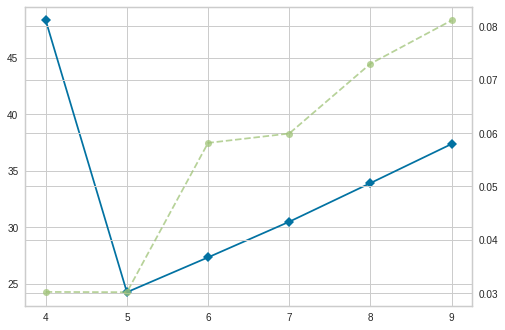

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, n_features=5, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

In [ ]:
# np.sum(np.square(np.linalg.norm(df - centroids[clusters], axis=1)))
# def sse(data, clusters, centroids):
#     return np.sum(np.square(np.linalg.norm(data - centroids[clusters], axis=1))) 

In [ ]:
df.to_csv('bikestations.csv') #to save

### Only Stations 2019

In [ ]:
stations_2019 = df[df['Year'] <= 2019] #save the 2019 stations data for use to jan18
stations_2019['idunplug_station'] = stations_2019['ids']
stations_2019['idplug_station'] = stations_2019['ids']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
stations_2019.head()

,id,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Anclajes,Longitud,Latitud,DIRECCION,Year,ids,idunplug_station,idplug_station
0,001 a,"440443,61","4474290,65",04/12/2019,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"CALLE DE ALCALA, 2",2019,1,1,1
2,2,"440134,83","4474678,23",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"CALLE DE MIGUEL MOYA, 1",2014,2,2,2
3,3,"440012,98","4475760,68",23/06/2014,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430323,"PLAZA DEL CONDE DEL VALLE DE SUCHIL, 2",2014,3,3,3
4,4,"440396,4","4475565,36",23/06/2014,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428591,"CALLE DE MANUELA MALASAÑA, 3",2014,4,4,4
5,5,"440446,9","4475539,69",23/06/2014,01 CENTRO,01-04 JUSTICIA,"FUENCARRAL, CALLE, DE",106,BiciMAD,27,-3.702076,40.428363,"CALLE DE FUENCARRAL, 106",2014,5,5,5


# Unification processing Dataset (Jan18 and Stations_2019)

In [ ]:
new_dataset = pd.merge(jan18, stations_2019, on='idunplug_station') #join jan18 and stations_2019 using idunplug_station

In [ ]:
new_dataset.columns #get the columns

Index(['id_x', 'user_day_code', 'idunplug_station', 'idunplug_base',
       'idplug_station_x', 'idplug_base', 'user_type', 'travel_time',
       'unplug_hourTime', 'ageRange', 'zip_code', 'id_y', 'Gis_X', 'Gis_Y',
       'Fecha de Alta', 'Distrito', 'Barrio', 'Calle', 'Nº Finca',
       'Tipo de Reserva', 'Anclajes', 'Longitud', 'Latitud', 'DIRECCION',
       'Year', 'ids', 'idplug_station_y'],
      dtype='object')

In [ ]:
new_dataset = new_dataset.rename(columns={'Gis_X':'Gis_Xidunplug',
       'Gis_Y':'Gis_Yidunplug', 'Fecha de Alta':'Fecha de Alta_idunplug', 'Distrito':'Distrito_idunplug', 'Barrio':'Barrio_idunplug', 'Calle':'Calle_idunplug', 'Nº Finca':'Nº Finca_idunplug',
        'Anclajes':'Anclajes_idunplug', 'Longitud':'Longitud_idunplug', 'Latitud':'Latitud_idunplug', 'DIRECCION':'DIRECCION_idunplug',
       'Year':'Year_idunplug', 'Locationlist':'Locationlist_idunplug', 'X':'X_idunplug', 'Y':'Y_idunplug'}) #change de name of the columns

del new_dataset['ids']

In [ ]:
new_dataset.head(1) #show first values

,id_x,user_day_code,idunplug_station,idunplug_base,idplug_station_x,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code,id_y,Gis_Xidunplug,Gis_Yidunplug,Fecha de Alta_idunplug,Distrito_idunplug,Barrio_idunplug,Calle_idunplug,Nº Finca_idunplug,Tipo de Reserva,Anclajes_idunplug,Longitud_idunplug,Latitud_idunplug,DIRECCION_idunplug,Year_idunplug,idplug_station_y
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,6,"440754,26","4475071,08",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",63,BiciMAD,24,-3.698409,40.424163,"CALLE DE HORTALEZA, 63",2014,6


In [ ]:
another_dataset = pd.merge(jan18,stations_2019, on = 'idplug_station') # join jan18 and stations_2019 by idplug_station

In [ ]:
another_dataset = another_dataset.rename(columns={'Gis_X':'Gis_Xidplug',
       'Gis_Y':'Gis_Yidplug', 'Fecha de Alta':'Fecha de Alta_idplug', 'Distrito':'Distrito_idplug', 'Barrio':'Barrio_idplug', 'Calle':'Calle_idplug', 'Nº Finca':'Nº Finca_idplug',
        'Anclajes':'Anclajes_idplug', 'Longitud':'Longitud_idplug', 'Latitud':'Latitud_idplug', 'DIRECCION':'DIRECCION_idplug',
       'Year':'Year_idplug', 'Locationlist':'Locationlist_idplug', 'X':'X_idplug', 'Y':'Y_idplug'}) #change the name of columns

In [ ]:
del another_dataset['ids']
another_dataset.head(5) #show the first five values

,id_x,user_day_code,idunplug_station_x,idunplug_base,idplug_station,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code,id_y,Gis_Xidplug,Gis_Yidplug,Fecha de Alta_idplug,Distrito_idplug,Barrio_idplug,Calle_idplug,Nº Finca_idplug,Tipo de Reserva,Anclajes_idplug,Longitud_idplug,Latitud_idplug,DIRECCION_idplug,Year_idplug,idunplug_station_y
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7
1,5a505acf2f384319304ed839,9ff0154193786639eb616b117c1074bcdd2f3c816bd2e4...,166,8,7,10,1,1794,{'$date': '2018-01-01T01:00:00.000+0100'},0,,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7
2,5a505ad02f384319304ed944,d0e7f8317a1ad450b8f68aa732de5490aca6578dbfde7d...,172,12,7,16,1,3486,{'$date': '2018-01-01T03:00:00.000+0100'},0,,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7
3,5a505ad52f384319304edde2,a60edc14b1678216d7c98c1f188aa37a2785ce99f41523...,175,19,7,2,1,643,{'$date': '2018-01-01T12:00:00.000+0100'},4,28005,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7
4,5a505ad72f384319304edf6b,af2a4b5c836c54152b0f611fd272b746b8f08bce4ff6c0...,163,4,7,22,1,815,{'$date': '2018-01-01T13:00:00.000+0100'},5,28015,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.69774,40.425216,"CALLE DE HORTALEZA, 75",2014,7


In [ ]:
another_dataset.to_csv("another_dataset")#to save 

In [ ]:
new_dataset.to_csv("new_dataset")# to save

In [ ]:
join_data = pd.merge(new_dataset, another_dataset, on=['user_day_code']) #IT'S WORK!

In [ ]:
join_data.columns

Index(['id_x_x', 'user_day_code', 'idunplug_station', 'idunplug_base_x',
       'idplug_station_x', 'idplug_base_x', 'user_type_x', 'travel_time_x',
       'unplug_hourTime_x', 'ageRange_x', 'zip_code_x', 'id_y_x',
       'Gis_Xidunplug', 'Gis_Yidunplug', 'Fecha de Alta_idunplug',
       'Distrito_idunplug', 'Barrio_idunplug', 'Calle_idunplug',
       'Nº Finca_idunplug', 'Tipo de Reserva_x', 'Anclajes_idunplug',
       'Longitud_idunplug', 'Latitud_idunplug', 'DIRECCION_idunplug',
       'Year_idunplug', 'idplug_station_y', 'id_x_y', 'idunplug_station_x',
       'idunplug_base_y', 'idplug_station', 'idplug_base_y', 'user_type_y',
       'travel_time_y', 'unplug_hourTime_y', 'ageRange_y', 'zip_code_y',
       'id_y_y', 'Gis_Xidplug', 'Gis_Yidplug', 'Fecha de Alta_idplug',
       'Distrito_idplug', 'Barrio_idplug', 'Calle_idplug', 'Nº Finca_idplug',
       'Tipo de Reserva_y', 'Anclajes_idplug', 'Longitud_idplug',
       'Latitud_idplug', 'DIRECCION_idplug', 'Year_idplug',
       'idunp

In [ ]:
join_data.head(5)

,id_x_x,user_day_code,idunplug_station,idunplug_base_x,idplug_station_x,idplug_base_x,user_type_x,travel_time_x,unplug_hourTime_x,ageRange_x,zip_code_x,id_y_x,Gis_Xidunplug,Gis_Yidunplug,Fecha de Alta_idunplug,Distrito_idunplug,Barrio_idunplug,Calle_idunplug,Nº Finca_idunplug,Tipo de Reserva_x,Anclajes_idunplug,Longitud_idunplug,Latitud_idunplug,DIRECCION_idunplug,Year_idunplug,idplug_station_y,id_x_y,idunplug_station_x,idunplug_base_y,idplug_station,idplug_base_y,user_type_y,travel_time_y,unplug_hourTime_y,ageRange_y,zip_code_y,id_y_y,Gis_Xidplug,Gis_Yidplug,Fecha de Alta_idplug,Distrito_idplug,Barrio_idplug,Calle_idplug,Nº Finca_idplug,Tipo de Reserva_y,Anclajes_idplug,Longitud_idplug,Latitud_idplug,DIRECCION_idplug,Year_idplug,idunplug_station_y
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,6,"440754,26","4475071,08",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",63,BiciMAD,24,-3.698409,40.424163,"CALLE DE HORTALEZA, 63",2014,6,5a505acd2f384319304ed614,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,7,"440811,97","4475187,49",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",75,BiciMAD,21,-3.697740,40.425216,"CALLE DE HORTALEZA, 75",2014,7
1,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,3,65,8,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,6,"440754,26","4475071,08",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",63,BiciMAD,24,-3.698409,40.424163,"CALLE DE HORTALEZA, 63",2014,6,5a505adb2f384319304ee2dd,104,1,67,23,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,67,"441190,08","4473587,45",23/06/2014,01 CENTRO,01-03 CORTES,"ALMADEN, CALLE, DE",28,BiciMAD,24,-3.693135,40.410829,"CALLE DE ALMADEN, 28",2014,67
2,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,3,65,8,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,6,"440754,26","4475071,08",23/06/2014,01 CENTRO,01-04 JUSTICIA,"HORTALEZA, CALLE, DE",63,BiciMAD,24,-3.698409,40.424163,"CALLE DE HORTALEZA, 63",2014,6,5a505ad02f384319304ed925,6,3,65,8,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,65,"441513,54","4474236,11",23/06/2014,03 RETIRO,03-05 JERÓNIMOS,"ANTONIO MAURA, CALLE, DE",15,BiciMAD,24,-3.689382,40.416695,"CALLE DE ANTONIO MAURA, 15",2014,65
3,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,1,67,23,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,104,"441505,58","4475354,07",23/06/2014,04 SALAMANCA,04-01 RECOLETOS,"CASTELLANA, PASEO, DE LA",4,BiciMAD,21,-3.689579,40.426766,"PASEO DE LA CASTELLANA, 4",2014,104,5a505adb2f384319304ee2dd,104,1,67,23,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,67,"441190,08","4473587,45",23/06/2014,01 CENTRO,01-03 CORTES,"ALMADEN, CALLE, DE",28,BiciMAD,24,-3.693135,40.410829,"CALLE DE ALMADEN, 28",2014,67
4,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,1,67,23,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,104,"441505,58","4475354,07",23/06/2014,04 SALAMANCA,04-01 RECOLETOS,"CASTELLANA, PASEO, DE LA",4,BiciMAD,21,-3.689579,40.426766,"PASEO DE LA CASTELLANA, 4",2014,104,5a505ad02f384319304ed925,6,3,65,8,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,65,"441513,54","4474236,11",23/06/2014,03 RETIRO,03-05 JERÓNIMOS,"ANTONIO MAURA, CALLE, DE",15,BiciMAD,24,-3.689382,40.416695,"CALLE DE ANTONIO MAURA, 15",2014,65


In [ ]:
this_columns = ['id_x_x', 'user_day_code', 'idunplug_station', 'Distrito_idunplug', 'Barrio_idunplug','Longitud_idunplug', 'Latitud_idunplug', 
              'idplug_station_x', 'Distrito_idplug', 'Barrio_idplug', 'Longitud_idplug', 'Latitud_idplug',
               'user_type_x', 'travel_time_x','unplug_hourTime_x', 'ageRange_x', 'zip_code_x' ]

In [ ]:
join_data = join_data[this_columns]
join_data.head(5)

,id_x_x,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,idplug_station_x,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,user_type_x,travel_time_x,unplug_hourTime_x,ageRange_x,zip_code_x
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,7,01 CENTRO,01-04 JUSTICIA,-3.697740,40.425216,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010
1,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,65,01 CENTRO,01-03 CORTES,-3.693135,40.410829,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007
2,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,65,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007
3,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,67,01 CENTRO,01-03 CORTES,-3.693135,40.410829,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007
4,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,67,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007


In [ ]:
join_data.to_json("join_data")

#**Exploration unified data of Jan18 and Stations 2019**

### Acquiring data

In [ ]:
data = pd.read_json("/content/drive/My Drive/Colab Notebooks/data/join_data", encoding="utf-8", dtype="frame")

In [ ]:
data.head(100)

,id_x_x,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,idplug_station_x,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,user_type_x,travel_time_x,unplug_hourTime_x,ageRange_x,zip_code_x
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,7,01 CENTRO,01-04 JUSTICIA,-3.697740,40.425216,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010
1,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,65,01 CENTRO,01-03 CORTES,-3.693135,40.410829,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007
2,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,65,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007
3,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,67,01 CENTRO,01-03 CORTES,-3.693135,40.410829,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007
4,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,67,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5a505ae32f384319304ee870,0abc4136d2bee0ad74be0085531ce095a75427850d25a2...,149,05 CHAMARTÍN,05-01 EL VISO,-3.687848,40.449845,163,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,1,1550,{'$date': '2018-01-01T22:00:00.000+0100'},0,
96,5a505ae32f384319304ee870,0abc4136d2bee0ad74be0085531ce095a75427850d25a2...,149,05 CHAMARTÍN,05-01 EL VISO,-3.687848,40.449845,163,03 RETIRO,03-04 IBIZA,-3.675206,40.421438,1,1550,{'$date': '2018-01-01T22:00:00.000+0100'},0,
97,5a505ae22f384319304ee71d,0abc4136d2bee0ad74be0085531ce095a75427850d25a2...,59,01 CENTRO,01-05 UNIVERSIDAD,-3.704117,40.425480,61,01 CENTRO,01-04 JUSTICIA,-3.697740,40.425216,1,1173,{'$date': '2018-01-01T20:00:00.000+0100'},0,
98,5a505ae22f384319304ee71d,0abc4136d2bee0ad74be0085531ce095a75427850d25a2...,59,01 CENTRO,01-05 UNIVERSIDAD,-3.704117,40.425480,61,02 ARGANZUELA,02-02 ACACIAS,-3.706437,40.403635,1,1173,{'$date': '2018-01-01T20:00:00.000+0100'},0,


In [ ]:
# data.columns
data = data.rename(columns={'id_x_x': '_id','idplug_station_x':'idplug_station',
       'user_type_x':'user_type', 'travel_time_x':'travel_time',
       'unplug_hourTime_x':'unplug_hourTime', 'ageRange_x':'ageRange', 'zip_code_x':'zip_code'})

### User_day_code by age

In [ ]:
data.groupby('user_day_code')['ageRange'].value_counts().describe()

count    140719.000000
mean         20.797682
std         454.710082
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       38416.000000
Name: ageRange, dtype: float64

#### Histogram of AgeRange by User_day_code

(array([ 255858.,  709123.,       0.,    9080.,       0.,  180968.,
        1165861.,       0.,  602722.,    3017.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

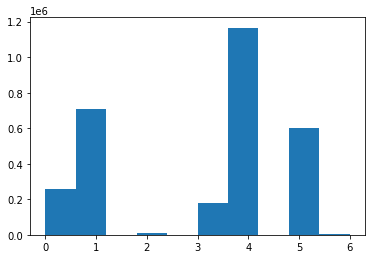

In [ ]:
plt.hist(data['ageRange'])

#### Display plot of AgeRange by User_day_code

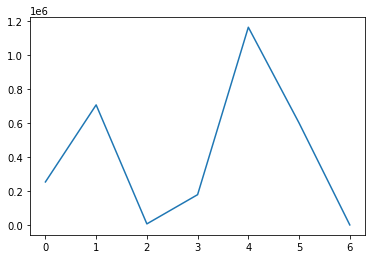

In [ ]:
plt.plot(data.groupby('ageRange')['user_day_code'].count())

In [ ]:
data['ageRange'].mean()

3.0633684693208467

###Manipulating data with time variable

In [ ]:
data['travel_minutes'] = data['travel_time'] / 60
data['travel_minutes']

0           4.733333
1          13.733333
2          13.733333
3           5.616667
4           5.616667
             ...    
2926624     5.216667
2926625     3.750000
2926626    11.400000
2926627     2.683333
2926628     2.900000
Name: travel_minutes, Length: 2926629, dtype: float64

In [ ]:
data['travel_minutes'].describe()

count    2.926629e+06
mean     2.963612e+01
std      2.524467e+02
min      1.666667e-02
25%      1.666667e-01
50%      9.933333e+00
75%      3.196667e+01
max      2.752708e+04
Name: travel_minutes, dtype: float64

#### Statistcs of User type by travel minutes.

In [ ]:
data.groupby('user_type')['travel_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
1,534546.0,15.790231,20.775760,0.066667,7.233333,10.750000,16.066667,359.716667
2,6324.0,36.316543,36.901316,1.083333,12.716667,22.858333,48.633333,327.383333
3,2385759.0,32.720677,279.328389,0.016667,0.150000,6.216667,36.833333,27527.083333


#### Grouping by possible type of trip

In [ ]:
travel_35 = data[(data['travel_minutes'] >= 15) & (data['travel_minutes'] <= 35)] # Funtional
travel_180 = data[(data['travel_minutes'] >= 35) & (data['travel_minutes'] <= 180)] # Recreative
travel_190 = data[data['travel_minutes'] >=181] # BreakDown

#### Travel Minutes Plotting

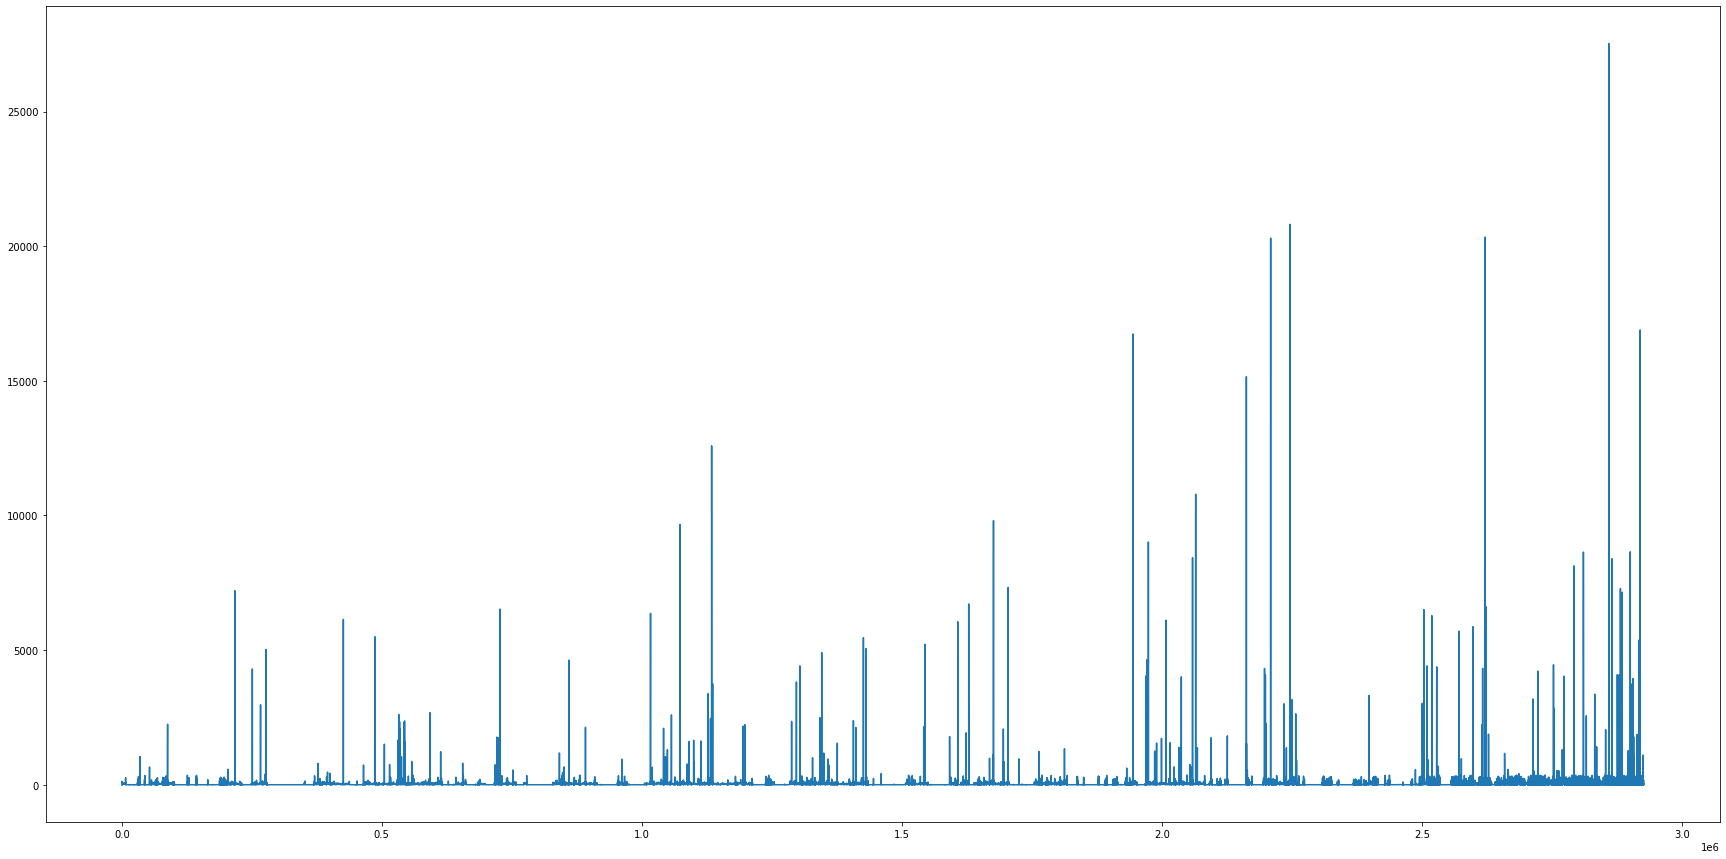

In [ ]:
 data['travel_minutes'].plot(figsize=(30, 15))

### Trip of a specific user

In [ ]:
data['user_day_code'][0]

'b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64644821b72d560b100f'

In [ ]:
data[data['user_day_code'] == 'b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64644821b72d560b100f']

,_id,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,idplug_station,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,user_type,travel_time,unplug_hourTime,ageRange,zip_code,travel_minutes
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,7,01 CENTRO,01-04 JUSTICIA,-3.69774,40.425216,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,4.733333


In [ ]:
data['idunplug_station'].sort_values().count()

2926629

In [ ]:
# aa = jan18[(jan18.idunplug_station == '1') & (jan18.idplug_station == '2')].index() #don't work

#### Display the tweenty user that most use the bike in January 18 month.

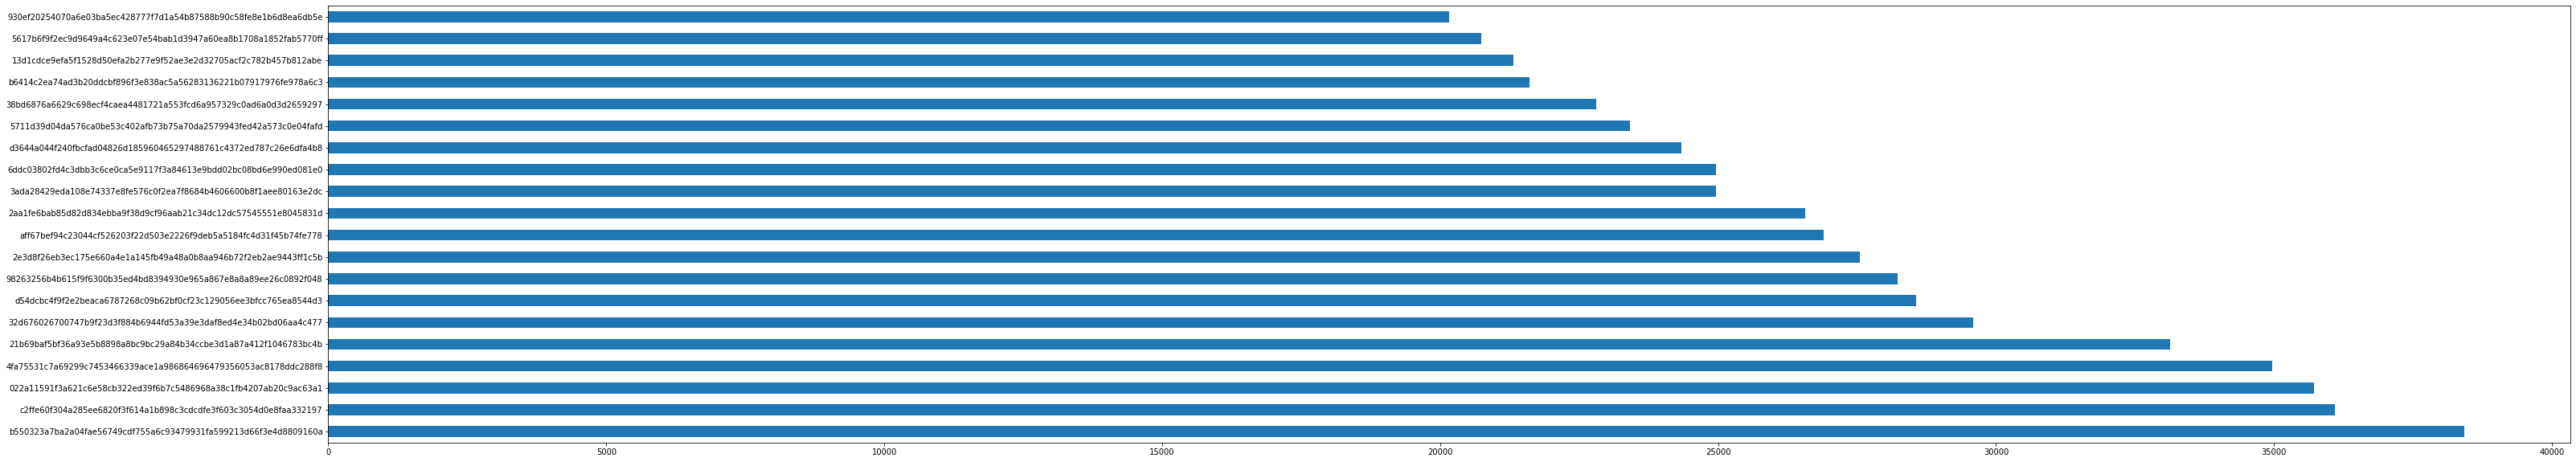

In [ ]:
mostfreque_user = data['user_day_code'].value_counts(sort=True).head(20)

fig = plt.figure(figsize=(50,10))
mostfreque_user.plot.barh()


In [ ]:
data['user_day_code'].value_counts(sort=True).head(1000)

b550323a7ba2a04fae56749cdf755a6c93479931fa599213d66f3e4d8809160a    38416
c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197    36100
022a11591f3a621c6e58cb322ed39f6b7c5486968a38c1fb4207ab20c9ac63a1    35721
4fa75531c7a69299c7453466339ace1a986864696479356053ac8178ddc288f8    34969
21b69baf5bf36a93e5b8898a8bc9bc29a84b34ccbe3d1a87a412f1046783bc4b    33124
                                                                    ...  
a79b451c762fcfdd2052715ff1b4446bc8d2550b5aff169cd4f061cdd5c4826f       36
4e3f5ce4f19db95e81e70a755db0647855bf9b625867be5140ad56af6761f40d       36
ecb84a006e1ca3f31220f1b808c165589b01776cdf489003153921caca2939e9       36
bd87e7ba688c0777cdce6e1c18bc62c9f68bedb2b1b74d29e9f86ce145bdb297       36
2547d01d662813407dfeb0f952c8b416fd2587680241e284209bad025f138595       36
Name: user_day_code, Length: 1000, dtype: int64

In [ ]:
data[data['user_day_code'] == 'c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197'] #example one person all his travel

,_id,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,idplug_station,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,user_type,travel_time,unplug_hourTime,ageRange,zip_code,travel_minutes
314362,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314363,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314364,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314365,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314366,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350457,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350458,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350459,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350460,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667


In [ ]:
station = pd.DataFrame(data['idunplug_station'], data['idplug_station']) #create a new dataframe

In [ ]:
data['idunplug_station'].value_counts

<bound method IndexOpsMixin.value_counts of 0            6
1            6
2            6
3          104
4          104
          ... 
2926624     29
2926625     29
2926626     29
2926627     29
2926628     29
Name: idunplug_station, Length: 2926629, dtype: int64>

In [ ]:
data['idunplug_station'].value_counts() # count values of idunplug_station 

128    67652
129    66468
135    66081
132    56105
43     51662
       ...  
173     6358
123     6164
5       5981
124     5838
29      3138
Name: idunplug_station, Length: 166, dtype: int64

In [ ]:
data['idunplug_station'].value_counts(normalize=True, sort=True) #relative frequence

128    0.023116
129    0.022711
135    0.022579
132    0.019171
43     0.017652
         ...   
173    0.002172
123    0.002106
5      0.002044
124    0.001995
29     0.001072
Name: idunplug_station, Length: 166, dtype: float64

In [ ]:
# Know the set in idunplug_station 
# set(jan18['idunplug_station'])

### Rank for user day variable

In [ ]:
user_rank = data['user_day_code'].value_counts()
user_rank

b550323a7ba2a04fae56749cdf755a6c93479931fa599213d66f3e4d8809160a    38416
c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197    36100
022a11591f3a621c6e58cb322ed39f6b7c5486968a38c1fb4207ab20c9ac63a1    35721
4fa75531c7a69299c7453466339ace1a986864696479356053ac8178ddc288f8    34969
21b69baf5bf36a93e5b8898a8bc9bc29a84b34ccbe3d1a87a412f1046783bc4b    33124
                                                                    ...  
fc0b1c4eb3a82e5318205b4f74a4c13d697c7094edd4e65f0c242d86ca801e2a        1
561015b4f3d7850ce2a162a435db47836fde663f6ee0804911912f3b81dc5076        1
72ada06f6e272f89c2e840e466dd4826c8ef67462b43efe53068de55333a9332        1
b96fbc93f73302af9cbdd407581e58147c79011e51fabe6e7180b01a6d2bf2c7        1
9d8d14d5e0cf17ecc3ff506d303368828d3f1f0998b0295c26c09333f5e74010        1
Name: user_day_code, Length: 140719, dtype: int64

In [ ]:
# Function per userday 
def userday(x):
  return data[data['user_day_code'] == x][['idunplug_station', 'idplug_station',
       'user_type','travel_time','unplug_hourTime', 'ageRange']]

In [ ]:
userday('c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197')

,idunplug_station,idplug_station,user_type,travel_time,unplug_hourTime,ageRange
314362,82,82,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1
314363,82,82,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1
314364,82,82,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1
314365,82,82,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1
314366,82,82,3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1
...,...,...,...,...,...,...
350457,88,88,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1
350458,88,88,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1
350459,88,88,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1
350460,88,88,3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1


In [ ]:
data.loc[data['user_day_code'] == 'c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197']

,_id,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,Locationlist_idunplug,idplug_station,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,Locationlist_idplug,user_type,travel_time,unplug_hourTime,ageRange,zip_code,travel_minutes
314362,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,"[40.4084793777221, -3.6696829497303702]",82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,"[40.411760253523, -3.6765767495872796]",3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314363,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,"[40.4084793777221, -3.6696829497303702]",82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,"[40.411760253523, -3.6765767495872796]",3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314364,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,"[40.4084793777221, -3.6696829497303702]",82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,"[40.411760253523, -3.6765767495872796]",3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314365,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,"[40.4084793777221, -3.6696829497303702]",82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,"[40.411760253523, -3.6765767495872796]",3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
314366,5a569d852f384338109b9644,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,82,03 RETIRO,03-03 ESTRELLA,-3.669683,40.408479,"[40.4084793777221, -3.6696829497303702]",82,03 RETIRO,03-05 JERÓNIMOS,-3.676577,40.411760,"[40.411760253523, -3.6765767495872796]",3,38,{'$date': '2018-01-06T16:00:00.000+0100'},1,,0.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350457,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350458,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350459,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667
350460,5a569d872f384338109b97a9,c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603...,88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",88,04 SALAMANCA,04-06 CASTELLANA,-3.683747,40.431208,"[40.431207871967395, -3.68374710672573]",3,10,{'$date': '2018-01-06T19:00:00.000+0100'},1,,0.166667


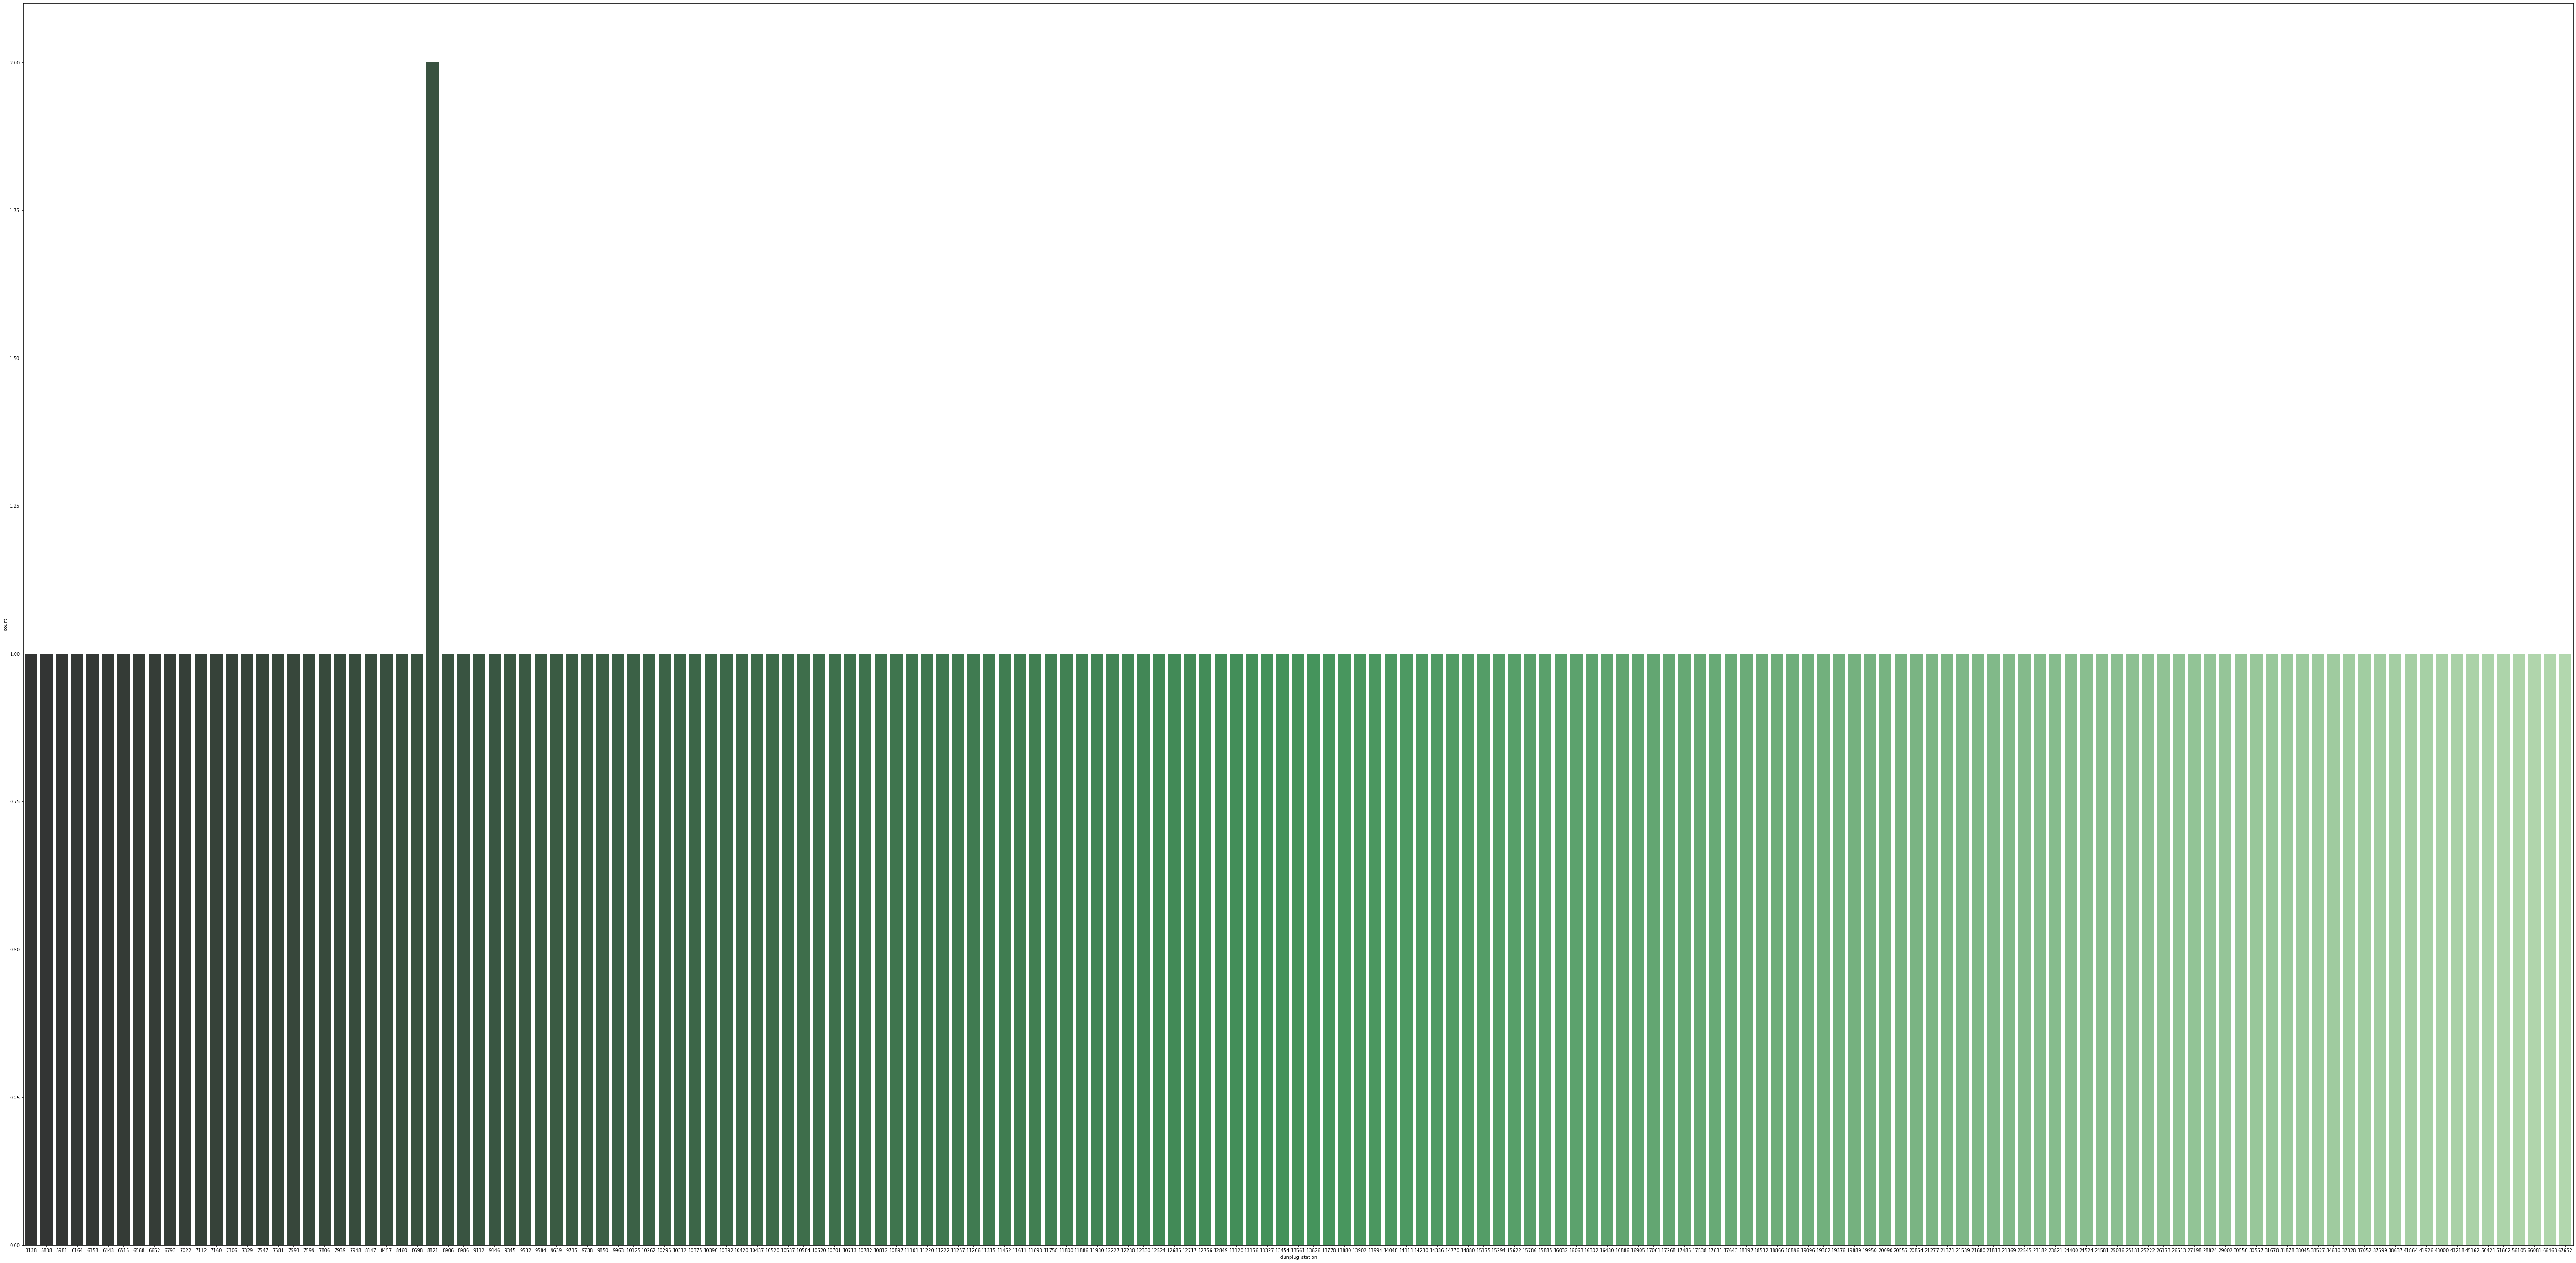

In [ ]:
fig = plt.figure(figsize=(100,50))
sns.countplot(x=data["idunplug_station"].value_counts(sort=True), data=data, hue_order=True, palette="Greens_d")


#### The most used stations for users

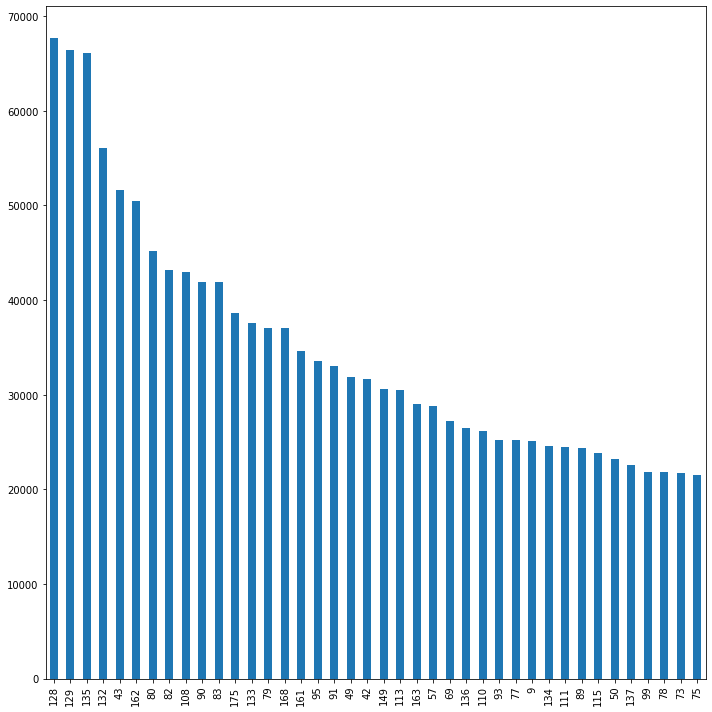

In [ ]:
# values_num_station = jan18["idunplug_station"].value_counts(sort=True).head(100)
most_stations = data["idunplug_station"].value_counts(sort=True).head(40)
fig = plt.figure(figsize=(10,10))
most_stations.plot(kind='bar')
plt.tight_layout()

In [ ]:
data["idunplug_station"].value_counts(sort=True)

128    67652
129    66468
135    66081
132    56105
43     51662
       ...  
173     6358
123     6164
5       5981
124     5838
29      3138
Name: idunplug_station, Length: 166, dtype: int64

In [ ]:
# fig, ax = plt.hist()
# y = jan18["idunplug_station"].value_counts(sort=True).head(3)
# x = ["129", "43", "57"]
# n = ax.hist(x, density=1)
# ax.hist(x, y)
# ax.set_xlabel('number station')
# ax.set_ylabel('frequence')
# ax.set_title(r'Testing')
# # Tweak spacing to prevent clipping of ylabel
# plt.show()

In [ ]:
# fig = plt.figure(figsize=(50,50))
# sns.countplot(x=jan18["idunplug_station"].value_counts(sort=True).head(5), data=jan18, palette="Greens_d")

In [ ]:
# aa=jan18[['idunplug_base']].rank()
# plt.hist(aa, bins = 8)

(array([1., 0., 0., 0., 0., 0., 0., 2., 3., 4., 3., 3., 4., 3., 2., 5., 3.,
        5., 3., 8., 8., 4., 5., 5., 3., 3., 2., 4., 3., 5., 2., 2., 2., 1.,
        3., 2., 1., 3., 2., 3., 1., 1., 2., 2., 1., 3., 0., 1., 1., 3., 3.,
        0., 1., 0., 1., 0., 1., 1., 2., 3., 0., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1.]),
 array([ 3138.        ,  3506.65142857,  3875.30285714,  4243.95428571,
         4612.60571429,  4981.25714286,  5349.90857143,  5718.56      ,
         6087.21142857,  6455.86285714,  6824.51428571,  7193.1657

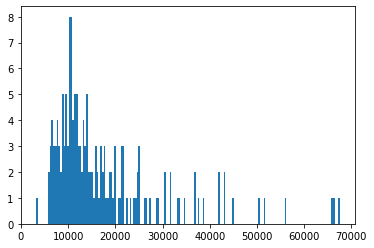

In [ ]:
plt.hist(data['idunplug_station'].value_counts(), bins=175)

In [ ]:
# cuelgan = jan18[   (jan18.idplug_station == 85)
#                   |(jan18.idplug_station == 74)
#                   |(jan18.idplug_station == 69)
#                   |(jan18.idplug_station == 65)
#                   |(jan18.idplug_station == 60)
#                   |(jan18.idplug_station == 79)
#                   |(jan18.idplug_station == 77)
#                   |(jan18.idplug_station == 76)
#                   |(jan18.idplug_station == 71)
#                   |(jan18.idplug_station == 68)
#                   |(jan18.idplug_station == 63)]

# #Gráfico
# import seaborn as sns
# import matplotlib.pyplot as plt
# graph = cuelgan['idunplug_station'].value_counts(normalize=True, sort=True)
# plt.figure(figsize=(50,10))
# sns.barplot(graph.index, graph.values, alpha=1)
# plt.xlabel('Estaciones donde van', fontsize=12)
# plt.ylabel('% de frecuencia', fontsize=12)
# plt.show()

# # Numero de usurios que llegan por estación, ordenado de mayor a menor
# cuelgan['idplug_station'].value_counts(sort=True).head()

### Type of user

* 0: Could not determine user type
* 1: Annual user (holder of an annual pass)
* 2: Occasional user
* 3: Company worker




In [ ]:
data['user_type'].value_counts()

3    2385759
1     534546
2       6324
Name: user_type, dtype: int64

In [ ]:
data['user_type'].describe()

count    2.926629e+06
mean     2.632541e+00
std      7.731308e-01
min      1.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: user_type, dtype: float64

### Zip Code

In [ ]:
## ZIP CODE 

# jan18['zip_code'].replace('^(?!^(?:0[1-9]|[1-4]\d|5[0-2])\d{3}$).*', np.nan, regex=True, inplace=True) #transform empty data
# len(jan18[-jan18['zip_code'].duplicated(keep=False)]) #count the data
# jan18['zip_code'].value_counts()
# # User by postal code withouth clean
# jan18.groupby(['zip_code'])['id'].count()

# # Function to clean of postal code 1/3
# def make_int(s):
#     s = s.strip()
#     return int(s) if (s and s.isdigit()) else 0

#     # Function to clean of postal code 2/3
# jan18['zip_code_as_int'] = jan18['zip_code'].apply(lambda x: make_int(x))

# # Function to clean of postal code 3/3
# zip_id = jan18.groupby(['zip_code_as_int'])['id'].count()

In [ ]:
# plt.scatter(top_idunp, top_idp)

### Correlation of idunplug base, idunplug station, idplug base, idplug station, user type and travel time

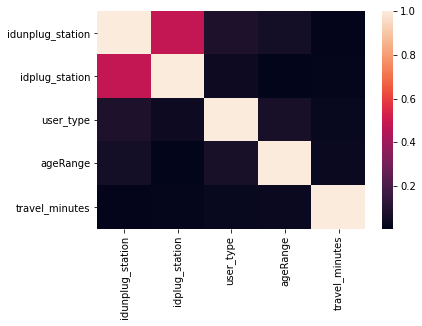

In [ ]:
sns.heatmap(data.loc[:, ['idunplug_station', 'idplug_station', 'user_type', 'ageRange', 'travel_minutes']].corr(), linewidths=0.0001)

In [ ]:
data.corr()

,idunplug_station,Longitud_idunplug,Latitud_idunplug,idplug_station,Longitud_idplug,Latitud_idplug,user_type,travel_time,ageRange,travel_minutes
idunplug_station,1.000000,0.004877,0.293414,0.481429,0.045166,0.124169,0.082160,0.012698,0.057669,0.012698
Longitud_idunplug,0.004877,1.000000,-0.007944,0.084953,0.167343,0.007014,0.060931,-0.003298,0.045965,-0.003298
Latitud_idunplug,0.293414,-0.007944,1.000000,0.142610,0.000606,0.166757,0.031778,0.000549,-0.010738,0.000549
idplug_station,0.481429,0.084953,0.142610,1.000000,0.051554,0.152363,0.038119,0.015928,0.005559,0.015928
Longitud_idplug,0.045166,0.167343,0.000606,0.051554,1.000000,0.047712,0.041877,0.005282,0.014669,0.005282
Latitud_idplug,0.124169,0.007014,0.166757,0.152363,0.047712,1.000000,0.026615,0.006221,0.003509,0.006221
user_type,0.082160,0.060931,0.031778,0.038119,0.041877,0.026615,1.000000,0.025841,0.070298,0.025841
travel_time,0.012698,-0.003298,0.000549,0.015928,0.005282,0.006221,0.025841,1.000000,0.029984,1.000000
ageRange,0.057669,0.045965,-0.010738,0.005559,0.014669,0.003509,0.070298,0.029984,1.000000,0.029984
travel_minutes,0.012698,-0.003298,0.000549,0.015928,0.005282,0.006221,0.025841,1.000000,0.029984,1.000000


In [ ]:
# sns.pairplot(jan18, x_vars=user_day_code, y_vars=idplugbase)

In [ ]:
%%time
# plt.scatter(userdaycode, idplugbase)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


CPU times: user 3min 38s, sys: 1.95 s, total: 3min 40s
Wall time: 3min 39s


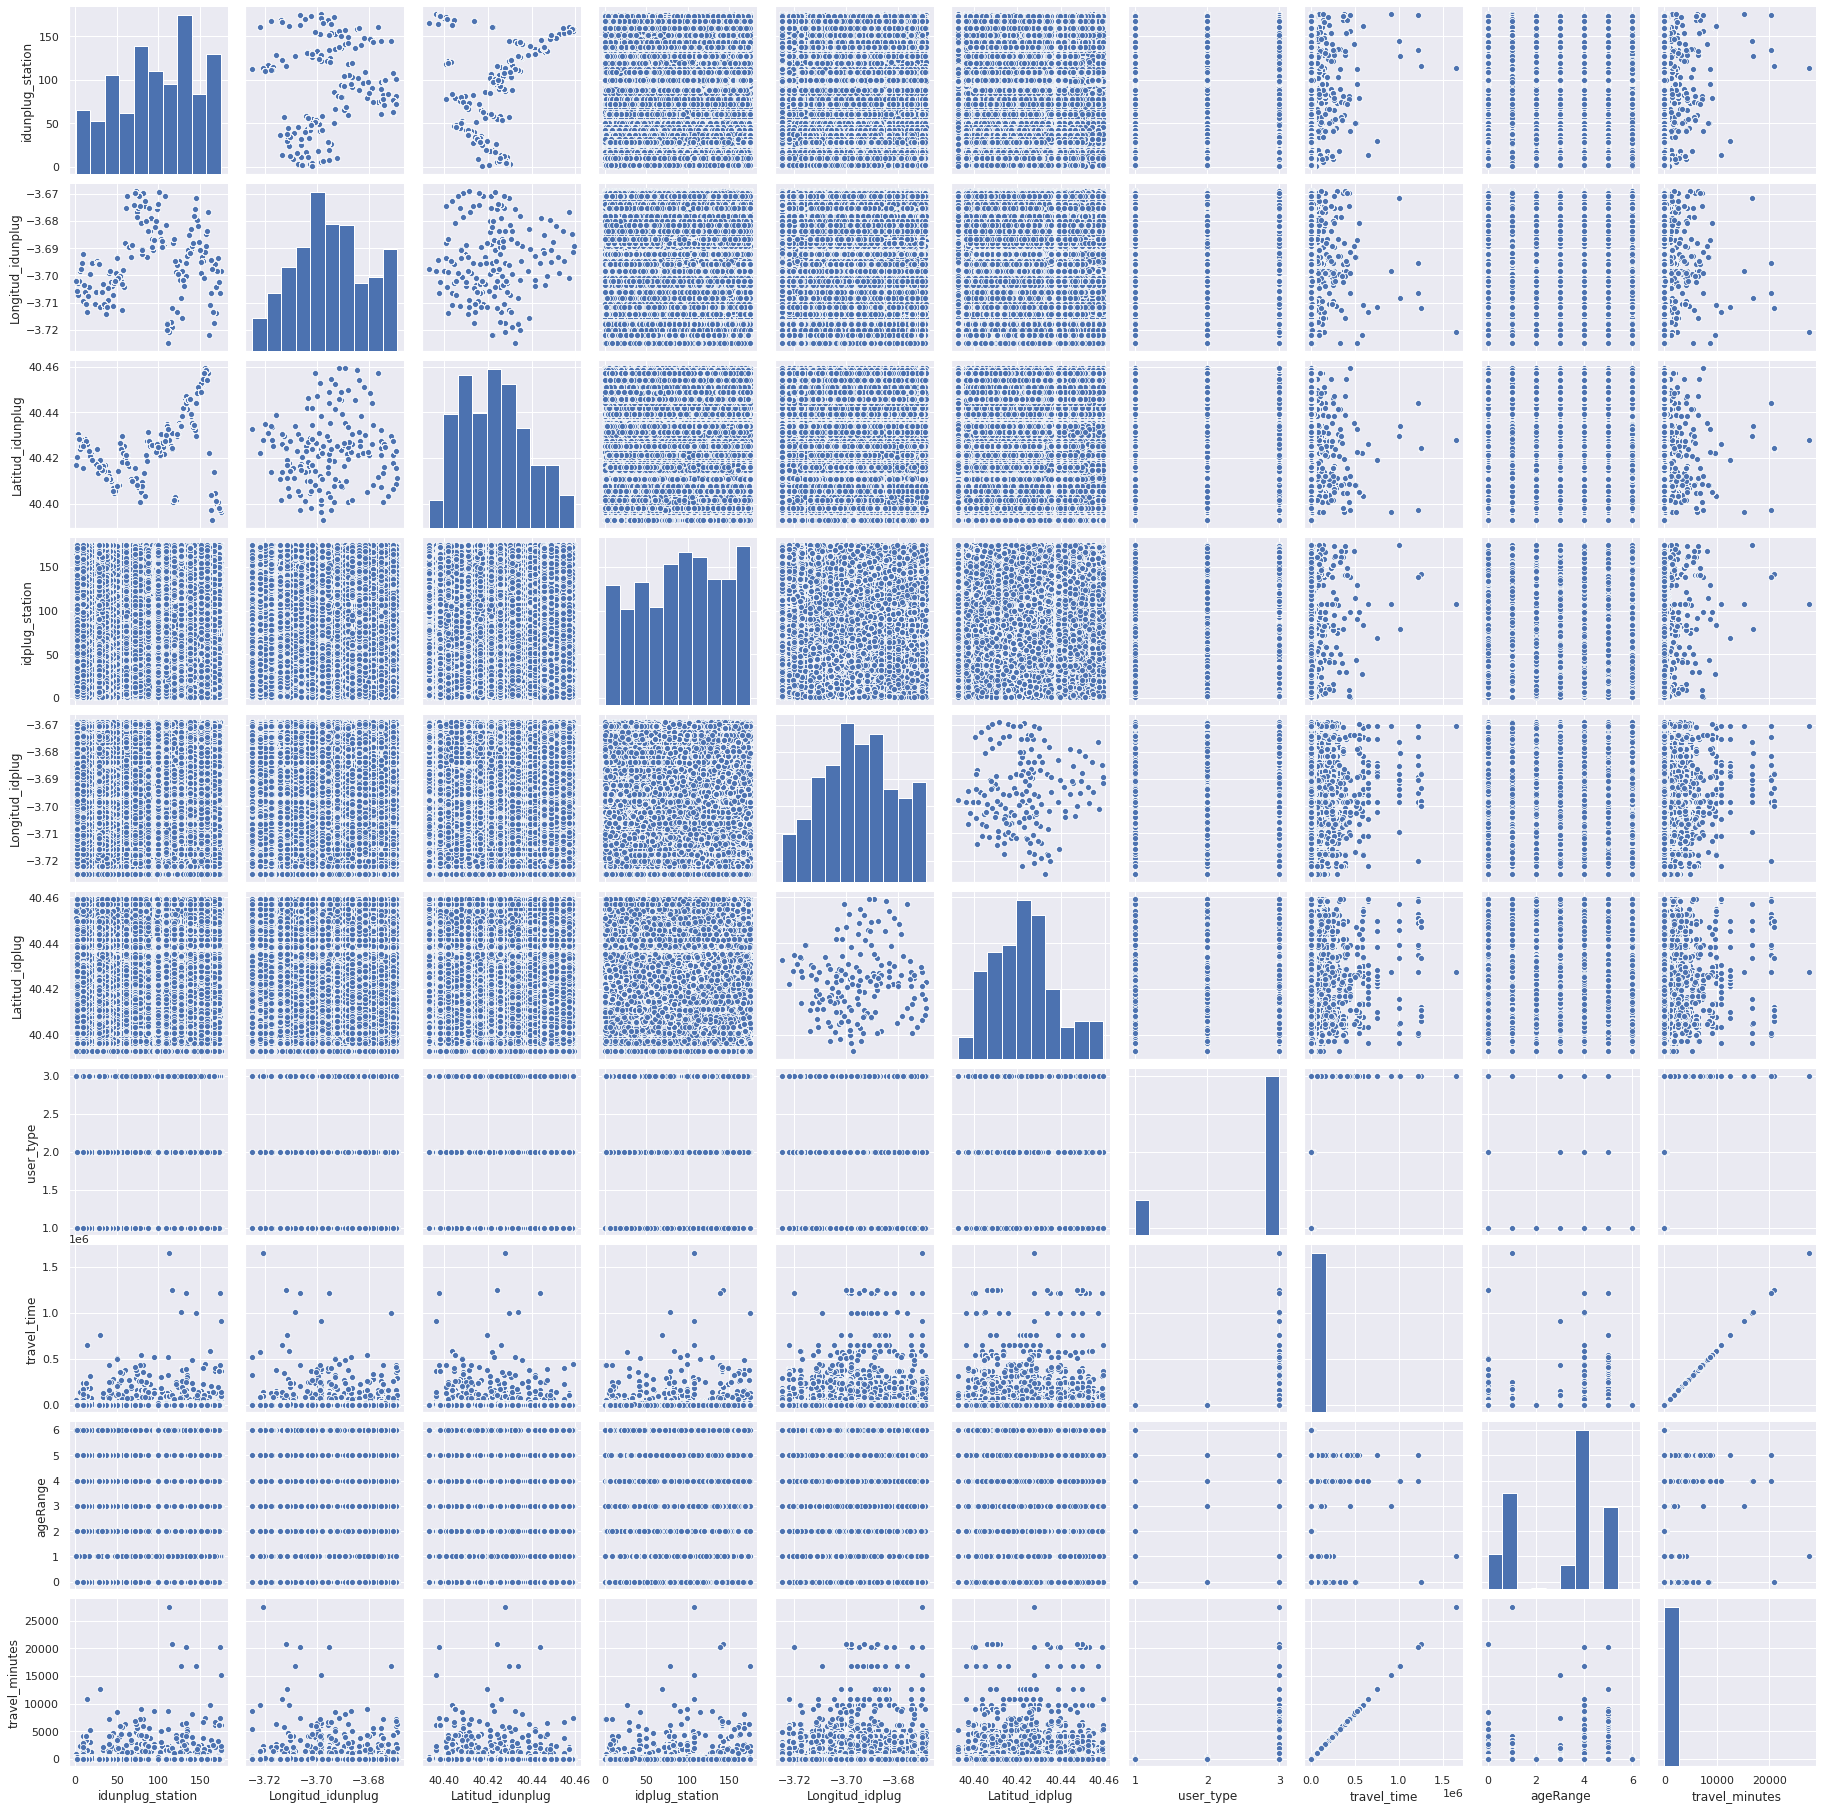

In [ ]:
%%time
sns.set()
sns.pairplot(data)

#### Distance Calculate using Haversine

In [ ]:
from numpy import cos, sin, arcsin, sqrt
from math import radians

def haversine(data):
  lon1 = data['Longitud_idunplug']
  lat1 = data['Latitud_idunplug']
  lon2 = data['Longitud_idplug']
  lat2 = data['Latitud_idplug']
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * arcsin(sqrt(a))
  km = 6367 * c # Tierra es una esfera perfecta de radio RT = 6367
  return km 


In [ ]:
data['distance'] = data.apply(lambda data: haversine(data), axis=1)

(array([574439., 477863., 505249., 518795., 378883., 250042., 122359.,
         64108.,  25885.,   9006.]),
 array([0.        , 0.74116649, 1.48233297, 2.22349946, 2.96466595,
        3.70583244, 4.44699892, 5.18816541, 5.9293319 , 6.67049838,
        7.41166487]),
 <a list of 10 Patch objects>)

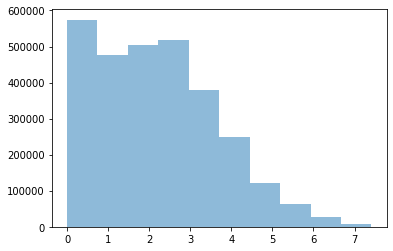

In [ ]:
plt.hist(data.distance, alpha =0.5)

In [ ]:
data.head()

,_id,user_day_code,idunplug_station,Distrito_idunplug,Barrio_idunplug,Longitud_idunplug,Latitud_idunplug,Locationlist_idunplug,idplug_station,Distrito_idplug,Barrio_idplug,Longitud_idplug,Latitud_idplug,Locationlist_idplug,user_type,travel_time,unplug_hourTime,ageRange,zip_code,travel_minutes,distance
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,"[40.4241634531642, -3.69840932124385]",7,01 CENTRO,01-04 JUSTICIA,-3.697740,40.425216,"[40.4252162366264, -3.69773989991129]",1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,4.733333,0.129976
1,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,"[40.4241634531642, -3.69840932124385]",65,01 CENTRO,01-03 CORTES,-3.693135,40.410829,"[40.4108291066682, -3.69313490661266]",1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,13.733333,1.547515
2,5a505ad02f384319304ed925,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,6,01 CENTRO,01-04 JUSTICIA,-3.698409,40.424163,"[40.4241634531642, -3.69840932124385]",65,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,"[40.416695352551606, -3.68938249653548]",1,824,{'$date': '2018-01-01T03:00:00.000+0100'},2,28007,13.733333,1.127794
3,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,"[40.4267659252939, -3.68957914803002]",67,01 CENTRO,01-03 CORTES,-3.693135,40.410829,"[40.4108291066682, -3.69313490661266]",1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,5.616667,1.796349
4,5a505adb2f384319304ee2dd,38f477ef63c0d2f1cfcc673e4a5b9054512c51f1756b3f...,104,04 SALAMANCA,04-01 RECOLETOS,-3.689579,40.426766,"[40.4267659252939, -3.68957914803002]",67,03 RETIRO,03-05 JERÓNIMOS,-3.689382,40.416695,"[40.416695352551606, -3.68938249653548]",1,337,{'$date': '2018-01-01T17:00:00.000+0100'},2,28007,5.616667,1.119217


#### Slope Calculate

In [ ]:
def slope(data):

  lon1 = data['Longitud_idunplug']
  lat1 = data['Latitud_idunplug']
  lon2 = data['Longitud_idplug']
  lat2 = data['Latitud_idplug']

  if slope != 0:
    lat_dif = lat2-lat1
    lon_dif = lon2-lon1
    m = lat_dif/lon_dif *100
    return m


In [ ]:
data['slope'] = data.apply(lambda data: slope(data), axis=1)

ZeroDivisionError: ignored

## Machine Learning Models

#### Shit Lineal Regression Model:
###### Objective variable is disengaging the bicycle (Idunplug_station) and features variable is bicycle hitch (Idplug_station). 

In [ ]:
y_train = jan18['idunplug_station'] #series
X_train = jan18[['idplug_station']] #dataframe

In [ ]:
# y_train

In [ ]:
# X_train

In [ ]:
# jan18.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the model
reg = LinearRegression()

# Train the regressor
model1 = reg.fit(X_train, y_train)

In [ ]:
reg.coef_

array([0.15646287])

In [ ]:
reg.intercept_

75.60738735117673

In [ ]:
y_train = reg.intercept_ + reg.coef * X

##### Predictions18 is of values the idunplug_station column. 

In [ ]:
predictions18 = jan18[['idunplug_station']]
# predict = reg.predict(jan18[['idunplug_station']])
predict = reg.predict(predictions18)
jan18['predictions18'] = predict

In [ ]:
jan18.describe()

,idunplug_station,idunplug_base,idplug_station,idplug_base,user_type,travel_time,ageRange,predictions,predictions2,predictions18
count,263701.000000,263701.000000,263701.000000,263701.000000,263701.000000,2.637010e+05,263701.000000,263701.000000,263701.000000,263701.000000
mean,89.599611,11.824794,89.428394,11.824718,1.229529,1.145827e+03,2.961544,89.790980,89.790980,89.626400
std,51.125729,7.527186,51.106964,7.548198,0.628855,8.851478e+03,1.966977,8.073925,8.073925,7.999278
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,75.763850,75.763850,75.763850
25%,47.000000,5.000000,46.000000,5.000000,1.000000,4.190000e+02,0.000000,83.274068,83.274068,82.961142
50%,87.000000,11.000000,87.000000,11.000000,1.000000,6.460000e+02,4.000000,89.532583,89.532583,89.219657
75%,134.000000,19.000000,134.000000,19.000000,1.000000,9.970000e+02,4.000000,96.729875,96.729875,96.573412
max,175.000000,30.000000,175.000000,30.000000,3.000000,1.651625e+06,6.000000,389.784838,389.784838,102.988390


In [ ]:
jan18.loc[:, ['idunplug_station','idplug_station', 'predictions18']]

,idunplug_station,idplug_station,predictions18
0,6,7,76.546165
1,24,117,79.362496
2,24,117,79.362496
3,82,110,88.437343
4,169,58,102.049613
...,...,...,...
263697,99,52,91.097212
263698,8,52,76.859090
263699,135,6,96.729875
263700,135,6,96.729875


In [ ]:
lm1 = sm.OLS(y_train, sm.add_constant(X_train))
lm_model= lm1.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       idunplug_station   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     6613.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:58:49   Log-Likelihood:            -1.4084e+06
No. Observations:              263701   AIC:                         2.817e+06
Df Residuals:                  263699   BIC:                         2.817e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             75.6074      0.198    381.498      0.000      75.219      75.996
idplug_station     0.1565      0.002     81.318      0.000       0.153       0.160
==============================================================================
Omnibus:                   109495.333   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13313.460
Skew:                          -0.009   Prob(JB):                         0.00
Kurtosis:                       1.899   Cond. No.                         208.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.metrics import mean_absolute_error

# Use against predictions
error1 = mean_absolute_error(reg.predict(X_train), y_train)

#### Another Linear Regression Model 

##### Objective variable is disengaging the bicycle (Idunplug_station) and features variable is bicycle hitch, user type and travel time(Idplug_station, user_type and travel_time).

In [ ]:
y_tr = jan18.idunplug_station
X_tr = jan18.loc[:, ['idplug_station', 'user_type', 'travel_time']]

In [ ]:
X_tr.shape
y_tr.shape

(263702,)

In [ ]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

model2 = reg2.fit(X_tr, y_tr)

In [ ]:
reg2.coef_

array([1.54919847e-01, 4.50246942e+00, 2.76765520e-05])

In [ ]:
reg2.intercept_

70.17774894701051

#####Predictions19 is of values the idunplug_station column.

In [ ]:
predictions=jan19[['idunplug_station']].head(263701)
predictions19 = reg.predict(predictions)
jan18['predictions19'] = predictions19

In [ ]:
lm2 = sm.OLS(y_tr, sm.add_constant(X_tr))

In [ ]:
lm_model2 = lm2.fit()
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       idunplug_station   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2494.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:08:25   Log-Likelihood:            -1.4080e+06
No. Observations:              263701   AIC:                         2.816e+06
Df Residuals:                  263697   BIC:                         2.816e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             70.1777      0.273    257.484      0.000      69.644      70.712
idplug_station     0.1549      0.002     80.613      0.000       0.151       0.159
user_type          4.5025      0.157     28.730      0.000       4.195       4.810
travel_time     2.768e-05   1.11e-05      2.487      0.013    5.86e-06    4.95e-05
==============================================================================
Omnibus:                   106212.979   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13197.847
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       1.904   Cond. No.                     2.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.metrics import mean_absolute_error
# Use against predictions
error2 = mean_absolute_error(reg2.predict(X_tr), y_tr)

## Load Jan19 Dataset 

In [ ]:
downloaded = drive.CreateFile({'id':'1imkDjnvj6N7Bw5KaYCRU-wvZIfFX6tZT'})
downloaded.GetContentFile('jan19.json')

In [ ]:
jan19 = pd.read_json("jan19.json", encoding='latin-1', lines=True, dtype='frame')

In [ ]:
# jan19.shape 

# predictions
#263701

In [ ]:
jan18.shape

(263701, 11)

In [ ]:
position = dict(enumerate(jan19['_id'].values))
position
type(position)
ids19 = []
for d, v in position.items():
    ids19 += list(v.values())

In [ ]:
jan19['_id'] = ids19
jan19 = jan19[na_columns]
jan19 = jan19.rename(columns = {'_id':'id'})
jan19.head()

,id,user_day_code,idunplug_station,idunplug_base,idplug_station,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code
0,5c4b07ea2f38432e007daab8,b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5...,82,23,83,14,1,162,{'$date': '2019-01-01T00:00:00.000+0100'},0,
1,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,133,1,36,10,1,415,{'$date': '2019-01-01T00:00:00.000+0100'},5,28005
2,5c4b07ea2f38432e007daabb,905737396c2fe343c84d62eaee3ab66e19632638c5bea7...,25,3,90,5,1,545,{'$date': '2019-01-01T00:00:00.000+0100'},0,
3,5c4b07ea2f38432e007daabd,5922b4a1a2591161ebf1ad66f42f52cc7796f3754c2c76...,105,6,155,18,1,417,{'$date': '2019-01-01T00:00:00.000+0100'},3,28009
4,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,51,12,44,4,1,448,{'$date': '2019-01-01T00:00:00.000+0100'},4,28005


In [ ]:
predictions2 = jan19[['idunplug_station']]

In [ ]:
# predict_2 = reg2.predict(jan18[['idunplug_station']])
predict2 = reg2.predict([predictions2])

NameError: ignored

In [ ]:
jan18['predictions2'] = predict_2

NameError: ignored

In [ ]:
jan18.head()

,id,user_day_code,idunplug_station,idunplug_base,idplug_station,idplug_base,user_type,travel_time,unplug_hourTime,ageRange,zip_code,predictions,predictions2
0,5a505acd2f384319304ed614,b00665a845be18ed9f036c2d72def1ef2fa2c49365cb64...,6,14,7,1,1,284,{'$date': '2018-01-01T00:00:00.000+0100'},5,28010,76.546165,76.546165
1,5a505acd2f384319304ed615,65a82ac6353d9e8b25c17a49bb46d09426757b40946370...,24,21,117,4,1,666,{'$date': '2018-01-01T00:00:00.000+0100'},0,,79.362496,79.362496
2,5a505acd2f384319304ed616,51b7da733980586e1f847b61cc4af9c0268fc2d09df63e...,24,19,117,19,1,662,{'$date': '2018-01-01T00:00:00.000+0100'},0,,79.362496,79.362496
3,5a505acd2f384319304ed617,0af09bb0e23045fb7328123044822a0eb9cf154d644a96...,82,2,110,1,1,708,{'$date': '2018-01-01T00:00:00.000+0100'},3,28005,88.437343,88.437343
4,5a505acd2f384319304ed619,500e6780660a1fb237f8e5410992296141a46b141ed3ff...,169,3,58,5,1,171,{'$date': '2018-01-01T00:00:00.000+0100'},4,28004,102.049613,102.049613


In [ ]:
jan18.loc[:, ['idunplug_station','idplug_station']]

,idunplug_station,idplug_station
0,6,7
1,24,117
2,24,117
3,82,110
4,169,58
...,...,...
263697,99,52
263698,8,52
263699,135,6
263700,135,6


#### Working with users use the bike with most frequence

In [ ]:
mostfreque_user.head()

c2ffe60f304a285ee6820f3f614a1b898c3cdcdfe3f603c3054d0e8faa332197    196
6ddc03802fd4c3dbb3c6ce0ca5e9117f3a84613e9bdd02bc08bd6e990ed081e0    183
4fa75531c7a69299c7453466339ace1a986864696479356053ac8178ddc288f8    183
21b69baf5bf36a93e5b8898a8bc9bc29a84b34ccbe3d1a87a412f1046783bc4b    182
b550323a7ba2a04fae56749cdf755a6c93479931fa599213d66f3e4d8809160a    179
Name: user_day_code, dtype: int64

# Conecting into Mobility Lab API


In [ ]:
import requests

In [ ]:
# url = 'https://openapi.emtmadrid.es/v1/transport/bicimad/stations/<idStation>/'
resp = requests.get('https://openapi.emtmadrid.es/v1/transport/bicimad/stations/<idStation>/')
resp.content[:500]

b'{"code": "80", "description": "Error, token none not found in cache", "datetime": "2020-04-11T18:25:37.725984", "data": []}'

In [ ]:
r = requests.get('https://openapi.emtmadrid.es/v1/transport/bicimad/stations/<idStation>/')
r.status_code

200

In [ ]:
r.content

b'{"code": "80", "description": "Error, token none not found in cache", "datetime": "2020-04-11T18:27:46.344736", "data": []}'

In [ ]:
r = requests.get('https://openapi.emtmadrid.es/v1/mobilitylabs/collection/reactive/<idcollection>/<idlinkname>/')

In [ ]:
curl -X POST \


NameError: ignored